# Imports and settings

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

In [2]:
project_path=os.getcwd()
project_path

'C:\\Andrea\\Tutoring\\Teaching Statistics\\Fatima AlYousif'

In [3]:
data_path=os.path.join(project_path,"data")
data_path

'C:\\Andrea\\Tutoring\\Teaching Statistics\\Fatima AlYousif\\data'

# Script

## Data Preparation

In [4]:
df=pd.read_excel(os.path.join(data_path,"Student_CH_ALL_15min_HW.xlsx"), sheet_name="CH_ALL2_15min", index_col=1).drop(columns=["Count","date","time","day"])
df.insert(0,"day",df.index.day)
df.insert(0,"week",df.index.week)
df.insert(0,"month",df.index.month)
df.insert(0,"hour",df.index.hour)
df.insert(0,"dayweek",[calendar.day_name[d.weekday()] for d in df.index])
df.insert(0,"isWorking",1)
df.loc[df["day"].isin([1,7]),"isWorking"]=0
df

,isWorking,dayweek,hour,month,week,day,WindDir,WindSpeed,Rain,Te,RHe,hPa,SolarRad,PM2.5 Bloomsbury,NO2 Bloomsbury,PM2.5 Euston Road,NO2 Euston Road,CH_418_Temperature,CH_418_Humidity,CH_418_PM25,CH_418_CO2,CH_418_Light,CH_416_Temperature,CH_416_Humidity,CH_416_PM25,CH_416_CO2,CH_416_Light,CH_413_Temperature,CH_413_Humidity,CH_413_PM25,CH_413_CO2,CH_413_Light
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,Sunday,0,1,52,1,193.333333,2.700000,0.0,7.566667,76.000000,1018.0,0.0,30.8,10.8,28.7,71.8,20.826667,45.066667,7.466667,426.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:15:00,0,Sunday,0,1,52,1,192.333333,2.166667,0.0,7.366667,77.000000,1018.0,0.0,30.8,10.8,28.7,79.0,20.806667,45.006667,7.333333,425.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,0,Sunday,0,1,52,1,190.333333,2.500000,0.0,7.233333,77.000000,1017.0,0.0,30.8,10.8,28.7,109.4,20.726667,45.006667,7.800000,423.866667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:45:00,0,Sunday,0,1,52,1,194.000000,2.700000,0.0,7.100000,77.333333,1017.0,0.0,30.8,10.8,28.7,102.0,20.686667,45.140000,8.400000,422.466667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,0,Sunday,1,1,52,1,184.000000,1.733333,0.0,7.000000,78.000000,1017.0,0.0,22.9,17.3,26.4,100.9,20.640000,44.973333,8.800000,421.933333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00,1,Sunday,22,12,52,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,22.5,5.7,92.1,21.653333,48.320000,1.000000,426.200000,1.0,18.073333,67.133333,1.000000,412.266667,1.000000,20.400000,46.513333,1.133333,402.933333,1.0
2017-12-31 23:00:00,1,Sunday,23,12,52,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,20.7,5.4,78.9,21.600000,48.446667,1.000000,426.266667,1.8,18.073333,67.126667,1.000000,413.733333,1.800000,20.400000,46.293333,1.200000,404.000000,7.8
2017-12-31 23:15:00,1,Sunday,23,12,52,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,20.7,5.4,74.4,21.593333,48.293333,1.000000,426.866667,5.0,18.060000,67.120000,1.000000,413.800000,4.200000,20.373333,46.320000,1.066667,404.600000,35.0


### Overall rooms dataset

In [5]:
df_rooms=df.loc[:,[c for c in df.columns[17:] if c.split("_")[2] in ["Temperature","Humidity","PM25","CO2","Light"]]].T
df_rooms.insert(0, "room", df_rooms.index.str.split("_").str[0]+"_"+df_rooms.index.str.split("_").str[1])
df_rooms.insert(0, "measure",df_rooms.index.str.split("_").str[2])
df_rooms=df_rooms.set_index(["measure","room"])
df_rooms=df_rooms.T.stack(level=1).astype(float).groupby(level=0).mean()
df_rooms=df_rooms.copy()
df_rooms.insert(0,"day",df_rooms.index.day)
df_rooms.insert(0,"week",df_rooms.index.week)
df_rooms.insert(0,"month",df_rooms.index.month)
df_rooms.insert(0,"hour",df_rooms.index.hour)
df_rooms.insert(0,"dayweek",[calendar.day_name[d.weekday()] for d in df_rooms.index])
df_rooms.insert(0,"isWorking",1)
df_rooms.loc[df_rooms["day"].isin([1,7]),"isWorking"]=0
df_rooms=df_rooms.dropna(subset=["Temperature","Humidity","PM25","CO2","Light"], axis=0, how="all")
df_rooms

measure,isWorking,dayweek,hour,month,week,day,CO2,Humidity,Light,PM25,Temperature
Timestamp,,,,,,,,,,,
2017-01-01 00:00:00,0,Sunday,0,1,52,1,426.666667,45.066667,1.000000,7.466667,20.826667
2017-01-01 00:15:00,0,Sunday,0,1,52,1,425.000000,45.006667,1.000000,7.333333,20.806667
2017-01-01 00:30:00,0,Sunday,0,1,52,1,423.866667,45.006667,1.000000,7.800000,20.726667
2017-01-01 00:45:00,0,Sunday,0,1,52,1,422.466667,45.140000,1.000000,8.400000,20.686667
2017-01-01 01:00:00,0,Sunday,1,1,52,1,421.933333,44.973333,1.000000,8.800000,20.640000
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00,1,Sunday,22,12,52,31,413.800000,53.988889,1.000000,1.044444,20.042222
2017-12-31 23:00:00,1,Sunday,23,12,52,31,414.666667,53.955556,3.800000,1.066667,20.024444
2017-12-31 23:15:00,1,Sunday,23,12,52,31,415.088889,53.911111,14.733333,1.022222,20.008889


###  Building dataset

In [6]:
df_building=df.loc[:,["WindDir","WindSpeed","Rain","Te","RHe","hPa","SolarRad"]].dropna(axis=0, how="all")
df_building.index=pd.to_datetime(df_building.index)
df_building.insert(0,"day",df_building.index.day)
df_building.insert(0,"week",df_building.index.week)
df_building.insert(0,"month",df_building.index.month)
df_building.insert(0,"hour",df_building.index.hour)
df_building.insert(0,"dayweek",[calendar.day_name[d.weekday()] for d in df_building.index])
df_building.insert(0,"isWorking",1)
df_building.loc[df_building["day"].isin([1,7]),"isWorking"]=0
df_building

,isWorking,dayweek,hour,month,week,day,WindDir,WindSpeed,Rain,Te,RHe,hPa,SolarRad
Timestamp,,,,,,,,,,,,,
2017-01-01 00:00:00,0,Sunday,0,1,52,1,193.333333,2.700000,0.000000,7.566667,76.000000,1018.000000,0.000000
2017-01-01 00:15:00,0,Sunday,0,1,52,1,192.333333,2.166667,0.000000,7.366667,77.000000,1018.000000,0.000000
2017-01-01 00:30:00,0,Sunday,0,1,52,1,190.333333,2.500000,0.000000,7.233333,77.000000,1017.000000,0.000000
2017-01-01 00:45:00,0,Sunday,0,1,52,1,194.000000,2.700000,0.000000,7.100000,77.333333,1017.000000,0.000000
2017-01-01 01:00:00,0,Sunday,1,1,52,1,184.000000,1.733333,0.000000,7.000000,78.000000,1017.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11 09:30:00,1,Monday,9,12,50,11,41.333333,2.600000,0.066667,3.233333,81.000000,974.000000,6.033333
2017-12-11 09:45:00,1,Monday,9,12,50,11,34.000000,2.766667,0.066667,3.266667,81.333333,974.333333,9.533333
2017-12-11 10:00:00,1,Monday,10,12,50,11,33.333333,2.600000,0.100000,3.166667,81.000000,975.000000,9.566667


### Single room dataset

In [7]:
df_single_rooms=df.loc[:,[c for c in df.columns[17:] if c.split("_")[2] in ["Temperature","Humidity","PM25","CO2","Light"]]].T
df_single_rooms.insert(0, "room", df_single_rooms.index.str.split("_").str[0]+"_"+df_single_rooms.index.str.split("_").str[1])
df_single_rooms.insert(0, "measure",df_single_rooms.index.str.split("_").str[2])
df_single_rooms=df_single_rooms.set_index(["measure","room"])
df_single_rooms=df_single_rooms.T.stack(level=1).astype(float)
df_single_rooms.insert(0,"day",pd.to_datetime(df_single_rooms.index.get_level_values(0)).day)
df_single_rooms.insert(0,"week",pd.to_datetime(df_single_rooms.index.get_level_values(0)).week)
df_single_rooms.insert(0,"month",pd.to_datetime(df_single_rooms.index.get_level_values(0)).month)
df_single_rooms.insert(0,"hour",pd.to_datetime(df_single_rooms.index.get_level_values(0)).hour)
df_single_rooms.insert(0,"dayweek",[calendar.day_name[d.weekday()] for d in pd.to_datetime(df_single_rooms.index.get_level_values(0))])
df_single_rooms.insert(0,"isWorking",1)
df_single_rooms.loc[df_single_rooms["day"].isin([1,7]),"isWorking"]=0
df_single_rooms=df_single_rooms.dropna(subset=["Temperature","Humidity","PM25","CO2","Light"], axis=0, how="all")
df_single_rooms

measure                     isWorking dayweek  hour  month  week  day  \
Timestamp           room                                                
2017-01-01 00:00:00 CH_418          0  Sunday     0      1    52    1   
2017-01-01 00:15:00 CH_418          0  Sunday     0      1    52    1   
2017-01-01 00:30:00 CH_418          0  Sunday     0      1    52    1   
2017-01-01 00:45:00 CH_418          0  Sunday     0      1    52    1   
2017-01-01 01:00:00 CH_418          0  Sunday     1      1    52    1   
...                               ...     ...   ...    ...   ...  ...   
2017-12-31 23:30:00 CH_416          1  Sunday    23     12    52   31   
                    CH_418          1  Sunday    23     12    52   31   
2017-12-31 23:45:00 CH_413          1  Sunday    23     12    52   31   
                    CH_416          1  Sunday    23     12    52   31   
                    CH_418          1  Sunday    23     12    52   31   

measure                            CO2   Humidity     Light      PM25  \
Timestamp           room                                                
2017-01-01 00:00:00 CH_418  426.666667  45.066667  1.000000  7.466667   
2017-01-01 00:15:00 CH_418  425.000000  45.006667  1.000000  7.333333   
2017-01-01 00:30:00 CH_418  423.866667  45.006667  1.000000  7.800000   
2017-01-01 00:45:00 CH_418  422.466667  45.140000  1.000000  8.400000   
2017-01-01 01:00:00 CH_418  421.933333  44.973333  1.000000  8.800000   
...                                ...        ...       ...       ...   
2017-12-31 23:30:00 CH_416  414.466667  67.100000  1.266667  1.066667   
                    CH_418  429.066667  48.293333  1.800000  1.000000   
2017-12-31 23:45:00 CH_413  404.533333  46.116667  1.000000  1.000000   
                    CH_416  415.533333  67.073333  1.000000  1.000000   
                    CH_418  428.666667  48.113333  1.000000  1.000000   

measure                     Temperature  
Timestamp           room                 
2017-01-01 00:00:00 CH_418    20.826667  
2017-01-01 00:15:00 CH_418    20.806667  
2017-01-01 00:30:00 CH_418    20.726667  
2017-01-01 00:45:00 CH_418    20.686667  
2017-01-01 01:00:00 CH_418    20.640000  
...                                 ...  
2017-12-31 23:30:00 CH_416    18.013333  
                    CH_418    21.566667  
2017-12-31 23:45:00 CH_413    20.311667  
                    CH_416    18.026667  
                    CH_418    21.566667  

[56032 rows x 11 columns]

### Outdoor dataset

In [8]:
df_outdoor=df.loc[:,["PM2.5 Bloomsbury","NO2 Bloomsbury","PM2.5 Euston Road","NO2 Euston Road"]].dropna(axis=0, how="all")
df_outdoor.index=pd.to_datetime(df_outdoor.index)
df_outdoor.insert(0,"day",df_outdoor.index.day)
df_outdoor.insert(0,"week",df_outdoor.index.week)
df_outdoor.insert(0,"month",df_outdoor.index.month)
df_outdoor.insert(0,"hour",df_outdoor.index.hour)
df_outdoor.insert(0,"dayweek",[calendar.day_name[d.weekday()] for d in df_outdoor.index])
df_outdoor.insert(0,"isWorking",1)
df_outdoor.loc[df_outdoor["day"].isin([1,7]),"isWorking"]=0
df_outdoor

,isWorking,dayweek,hour,month,week,day,PM2.5 Bloomsbury,NO2 Bloomsbury,PM2.5 Euston Road,NO2 Euston Road
Timestamp,,,,,,,,,,
2017-01-01 00:00:00,0,Sunday,0,1,52,1,30.8,10.8,28.7,71.8
2017-01-01 00:15:00,0,Sunday,0,1,52,1,30.8,10.8,28.7,79.0
2017-01-01 00:30:00,0,Sunday,0,1,52,1,30.8,10.8,28.7,109.4
2017-01-01 00:45:00,0,Sunday,0,1,52,1,30.8,10.8,28.7,102.0
2017-01-01 01:00:00,0,Sunday,1,1,52,1,22.9,17.3,26.4,100.9
...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00,1,Sunday,22,12,52,31,8.4,22.5,5.7,92.1
2017-12-31 23:00:00,1,Sunday,23,12,52,31,9.9,20.7,5.4,78.9
2017-12-31 23:15:00,1,Sunday,23,12,52,31,9.9,20.7,5.4,74.4


## Data Statistics

### Original Datasets

In [9]:
missing_dates=df.loc[:,df.columns].isna().all(axis=1)
missing_dates=pd.Series(missing_dates.loc[missing_dates].index.date).unique()
pd.Series(missing_dates).to_frame("missing dates")

,missing dates


In [10]:
df.shape

(35040, 32)

In [11]:
pd.Series(df.index).agg([min, max]).to_frame()

,Timestamp
min,2017-01-01 00:00:00
max,2017-12-31 23:45:00


In [12]:
days_count=df.groupby(df.index.date).size().to_frame(name="count")
days_count.query("count!=96")

,count
2017-03-26,92
2017-10-29,100


In [13]:
df.isna().sum()

isWorking                 0
dayweek                   0
hour                      0
month                     0
week                      0
day                       0
WindDir                3408
WindSpeed              3408
Rain                   2952
Te                     3408
RHe                    3408
hPa                    3408
SolarRad              13653
PM2.5 Bloomsbury       2032
NO2 Bloomsbury          492
PM2.5 Euston Road      3746
NO2 Euston Road         885
CH_418_Temperature     2724
CH_418_Humidity        2724
CH_418_PM25            2724
CH_418_CO2             2724
CH_418_Light           2724
CH_416_Temperature    19201
CH_416_Humidity       19201
CH_416_PM25           19201
CH_416_CO2            19201
CH_416_Light          19201
CH_413_Temperature    27163
CH_413_Humidity       27163
CH_413_PM25           27163
CH_413_CO2            27163
CH_413_Light          27163
dtype: int64

In [14]:
((df.isna().sum()/df.shape[0])*100).round(2)

isWorking              0.00
dayweek                0.00
hour                   0.00
month                  0.00
week                   0.00
day                    0.00
WindDir                9.73
WindSpeed              9.73
Rain                   8.42
Te                     9.73
RHe                    9.73
hPa                    9.73
SolarRad              38.96
PM2.5 Bloomsbury       5.80
NO2 Bloomsbury         1.40
PM2.5 Euston Road     10.69
NO2 Euston Road        2.53
CH_418_Temperature     7.77
CH_418_Humidity        7.77
CH_418_PM25            7.77
CH_418_CO2             7.77
CH_418_Light           7.77
CH_416_Temperature    54.80
CH_416_Humidity       54.80
CH_416_PM25           54.80
CH_416_CO2            54.80
CH_416_Light          54.80
CH_413_Temperature    77.52
CH_413_Humidity       77.52
CH_413_PM25           77.52
CH_413_CO2            77.52
CH_413_Light          77.52
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2017-01-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isWorking           35040 non-null  int64  
 1   dayweek             35040 non-null  object 
 2   hour                35040 non-null  int64  
 3   month               35040 non-null  int64  
 4   week                35040 non-null  int64  
 5   day                 35040 non-null  int64  
 6   WindDir             31632 non-null  float64
 7   WindSpeed           31632 non-null  float64
 8   Rain                32088 non-null  float64
 9   Te                  31632 non-null  float64
 10  RHe                 31632 non-null  float64
 11  hPa                 31632 non-null  float64
 12  SolarRad            21387 non-null  float64
 13  PM2.5 Bloomsbury    33008 non-null  float64
 14  NO2 Bloomsbury      34548 non-null  float64
 15  PM2.5 Euston Road 

In [16]:
df.describe().T.dropna(axis=0).iloc[5:].round(2)

,count,mean,std,min,25%,50%,75%,max
WindDir,31632.0,178.95,74.32,0.00,140.67,202.33,224.00,357.00
WindSpeed,31632.0,2.00,1.18,0.00,1.13,1.73,2.63,21.77
Rain,32088.0,0.01,0.68,0.00,0.00,0.00,0.00,119.60
Te,31632.0,13.03,5.70,-0.27,8.90,13.20,16.90,32.67
RHe,31632.0,63.75,13.22,20.00,54.67,66.00,74.00,87.67
hPa,31632.0,1010.70,9.40,966.00,1006.00,1011.67,1017.00,1033.00
SolarRad,21387.0,173.89,215.63,0.00,3.03,84.83,266.82,1083.53
PM2.5 Bloomsbury,33008.0,13.50,11.02,-1.40,7.20,10.40,15.50,125.10
NO2 Bloomsbury,34548.0,37.70,18.81,0.40,22.90,36.30,50.10,134.40
PM2.5 Euston Road,31294.0,13.56,9.48,-8.40,7.30,11.30,17.00,75.40


### Building stats

In [17]:
df_building.shape

(32088, 13)

In [18]:
df.loc[:,["WindDir","WindSpeed","Rain","Te","RHe","hPa","SolarRad"]].isna()

,WindDir,WindSpeed,Rain,Te,RHe,hPa,SolarRad
Timestamp,,,,,,,
2017-01-01 00:00:00,False,False,False,False,False,False,False
2017-01-01 00:15:00,False,False,False,False,False,False,False
2017-01-01 00:30:00,False,False,False,False,False,False,False
2017-01-01 00:45:00,False,False,False,False,False,False,False
2017-01-01 01:00:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2017-12-31 22:45:00,True,True,True,True,True,True,True
2017-12-31 23:00:00,True,True,True,True,True,True,True
2017-12-31 23:15:00,True,True,True,True,True,True,True


In [19]:
missing_dates=df.loc[:,["WindDir","WindSpeed","Rain","Te","RHe","hPa","SolarRad"]].isna().all(axis=1)
missing_dates=pd.Series(missing_dates.loc[missing_dates].index.date).unique()
pd.Series(missing_dates).to_frame("missing dates")

,missing dates
0,2017-01-12
1,2017-02-10
2,2017-03-06
3,2017-04-12
4,2017-04-24
5,2017-05-08
6,2017-05-09
7,2017-05-10
8,2017-05-11
9,2017-05-22


In [20]:
pd.Series(df_building.index).agg([min, max]).to_frame()

,Timestamp
min,2017-01-01 00:00:00
max,2017-12-11 10:30:00


In [21]:
days_count=df_building.groupby(df_building.index.date).size().to_frame(name="count")
days_count.query("count!=96")

,count
2017-01-12,95
2017-02-10,95
2017-03-06,95
2017-03-26,92
2017-04-12,95
2017-04-24,95
2017-05-08,89
2017-05-11,37
2017-05-22,95
2017-06-16,94


In [22]:
df_building.isna().sum()

isWorking        0
dayweek          0
hour             0
month            0
week             0
day              0
WindDir        456
WindSpeed      456
Rain             0
Te             456
RHe            456
hPa            456
SolarRad     10701
dtype: int64

In [23]:
((df_building.isna().sum()/df_building.shape[0])*100).round(2)

isWorking     0.00
dayweek       0.00
hour          0.00
month         0.00
week          0.00
day           0.00
WindDir       1.42
WindSpeed     1.42
Rain          0.00
Te            1.42
RHe           1.42
hPa           1.42
SolarRad     33.35
dtype: float64

In [24]:
df_building.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32088 entries, 2017-01-01 00:00:00 to 2017-12-11 10:30:00
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   isWorking  32088 non-null  int64  
 1   dayweek    32088 non-null  object 
 2   hour       32088 non-null  int64  
 3   month      32088 non-null  int64  
 4   week       32088 non-null  int64  
 5   day        32088 non-null  int64  
 6   WindDir    31632 non-null  float64
 7   WindSpeed  31632 non-null  float64
 8   Rain       32088 non-null  float64
 9   Te         31632 non-null  float64
 10  RHe        31632 non-null  float64
 11  hPa        31632 non-null  float64
 12  SolarRad   21387 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 3.4+ MB


In [25]:
df_building.describe().T.dropna(axis=0).iloc[5:].round(2)

,count,mean,std,min,25%,50%,75%,max
WindDir,31632.0,178.95,74.32,0.00,140.67,202.33,224.00,357.00
WindSpeed,31632.0,2.00,1.18,0.00,1.13,1.73,2.63,21.77
Rain,32088.0,0.01,0.68,0.00,0.00,0.00,0.00,119.60
Te,31632.0,13.03,5.70,-0.27,8.90,13.20,16.90,32.67
RHe,31632.0,63.75,13.22,20.00,54.67,66.00,74.00,87.67
hPa,31632.0,1010.70,9.40,966.00,1006.00,1011.67,1017.00,1033.00
SolarRad,21387.0,173.89,215.63,0.00,3.03,84.83,266.82,1083.53


### Overall Rooms stats

In [26]:
missing_dates=df.iloc[:,17:].isna().all(axis=1)
missing_dates=pd.Series(missing_dates.loc[missing_dates].index.date).unique()
pd.Series(missing_dates).to_frame("missing dates")

,missing dates
0,2017-01-03
1,2017-01-18
2,2017-02-14
3,2017-02-16
4,2017-02-17
5,2017-02-18
6,2017-02-19
7,2017-02-20
8,2017-02-21
9,2017-02-22


In [27]:
df_rooms.shape

(33789, 11)

In [28]:
days_count=df_rooms.groupby(df_rooms.index.date).size().to_frame(name="count")
days_count.query("count!=96")

,count
2017-01-03,87
2017-01-18,95
2017-02-14,95
2017-02-16,94
2017-02-17,1
2017-02-22,54
2017-03-15,73
2017-03-16,45
2017-03-17,12
2017-03-20,46


In [29]:
df_rooms.isna().sum()

measure
isWorking      0
dayweek        0
hour           0
month          0
week           0
day            0
CO2            0
Humidity       0
Light          0
PM25           0
Temperature    0
dtype: int64

In [30]:
((df_rooms.isna().sum()/df_rooms.shape[0])*100).round(2)

measure
isWorking      0.0
dayweek        0.0
hour           0.0
month          0.0
week           0.0
day            0.0
CO2            0.0
Humidity       0.0
Light          0.0
PM25           0.0
Temperature    0.0
dtype: float64

In [31]:
df_rooms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33789 entries, 2017-01-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isWorking    33789 non-null  int64  
 1   dayweek      33789 non-null  object 
 2   hour         33789 non-null  int64  
 3   month        33789 non-null  int64  
 4   week         33789 non-null  int64  
 5   day          33789 non-null  int64  
 6   CO2          33789 non-null  float64
 7   Humidity     33789 non-null  float64
 8   Light        33789 non-null  float64
 9   PM25         33789 non-null  float64
 10  Temperature  33789 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.1+ MB


In [32]:
df_rooms.describe().T.dropna(axis=0).iloc[5:].round(2)

,count,mean,std,min,25%,50%,75%,max
measure,,,,,,,,
CO2,33789.0,566.30,208.40,381.67,427.67,470.98,637.90,2327.47
Humidity,33789.0,52.63,10.95,26.21,43.92,52.33,60.37,88.87
Light,33789.0,233.01,387.83,1.00,1.00,43.40,436.06,13024.62
PM25,33789.0,4.34,4.82,1.00,1.68,2.73,4.87,57.20
Temperature,33789.0,23.25,1.88,16.38,22.08,23.39,24.57,28.65


### Single Rooms stats

In [33]:
missing_dates=df.iloc[:,17:].isna().all(axis=1)
missing_dates=pd.Series(missing_dates.loc[missing_dates].index.date).unique()
pd.Series(missing_dates).to_frame("missing dates")

,missing dates
0,2017-01-03
1,2017-01-18
2,2017-02-14
3,2017-02-16
4,2017-02-17
5,2017-02-18
6,2017-02-19
7,2017-02-20
8,2017-02-21
9,2017-02-22


In [34]:
df_single_rooms.shape

(56032, 11)

In [35]:
days_count=df_single_rooms.groupby(pd.to_datetime(df_single_rooms.index.get_level_values(0)).date).size().to_frame(name="count")
days_count.query("count!=96")

,count
2017-01-03,87
2017-01-18,95
2017-02-14,95
2017-02-16,94
2017-02-17,1
2017-02-22,54
2017-03-15,73
2017-03-16,45
2017-03-17,12
2017-03-20,46


In [36]:
df_single_rooms.isna().sum()

measure
isWorking      0
dayweek        0
hour           0
month          0
week           0
day            0
CO2            0
Humidity       0
Light          0
PM25           0
Temperature    0
dtype: int64

In [37]:
((df_single_rooms.isna().sum()/df_single_rooms.shape[0])*100).round(2)

measure
isWorking      0.0
dayweek        0.0
hour           0.0
month          0.0
week           0.0
day            0.0
CO2            0.0
Humidity       0.0
Light          0.0
PM25           0.0
Temperature    0.0
dtype: float64

In [38]:
df_single_rooms.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56032 entries, (Timestamp('2017-01-01 00:00:00'), 'CH_418') to (Timestamp('2017-12-31 23:45:00'), 'CH_418')
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isWorking    56032 non-null  int64  
 1   dayweek      56032 non-null  object 
 2   hour         56032 non-null  int64  
 3   month        56032 non-null  int64  
 4   week         56032 non-null  int64  
 5   day          56032 non-null  int64  
 6   CO2          56032 non-null  float64
 7   Humidity     56032 non-null  float64
 8   Light        56032 non-null  float64
 9   PM25         56032 non-null  float64
 10  Temperature  56032 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 6.5+ MB


In [39]:
df_single_rooms.iloc[:,6:].groupby(level=1).describe().T.dropna(axis=0).stack().unstack(1).round(2)

count    mean     std     min     25%     50%     75%  \
measure     room                                                              
CO2         CH_413   7877.0  526.48  164.60  381.40  416.27  461.27  572.27   
            CH_416  15839.0  590.50  274.95  400.00  428.13  477.33  639.53   
            CH_418  32316.0  550.91  189.11  381.20  424.00  460.80  621.72   
Humidity    CH_413   7877.0   51.61   10.28   16.78   45.71   53.20   58.95   
            CH_416  15839.0   63.38    9.25   39.56   56.84   63.14   69.12   
            CH_418  32316.0   51.65   10.56   26.21   43.29   51.47   59.23   
Light       CH_413   7877.0  280.17  275.02    1.00    1.00  219.87  498.00   
            CH_416  15839.0  277.46  993.24    1.00    1.00   19.67  491.27   
            CH_418  32316.0  211.26  333.48    1.00    1.00   16.40  397.02   
PM25        CH_413   7877.0    3.66    3.17    1.00    1.93    2.80    4.27   
            CH_416  15839.0    3.45    3.63    1.00    1.40    2.27    4.00   
            CH_418  32316.0    4.50    5.02    1.00    1.73    2.80    5.07   
Temperature CH_413   7877.0   23.89    1.65   18.98   22.87   23.95   25.03   
            CH_416  15839.0   22.94    2.33   16.01   21.50   23.07   24.65   
            CH_418  32316.0   23.38    1.91   16.38   22.20   23.54   24.70   

                         max  
measure     room              
CO2         CH_413   1384.60  
            CH_416   3942.33  
            CH_418   1838.87  
Humidity    CH_413     76.07  
            CH_416     96.69  
            CH_418     89.47  
Light       CH_413   2100.27  
            CH_416  37981.93  
            CH_418   3000.00  
PM25        CH_413     31.00  
            CH_416     74.45  
            CH_418     57.20  
Temperature CH_413     29.34  
            CH_416     33.29  
            CH_418     29.02

### Outdoor stats

In [40]:
missing_dates=df_outdoor.iloc[:,6:].isna().all(axis=1)
missing_dates=pd.Series(missing_dates.loc[missing_dates].index.date).unique()
pd.Series(missing_dates).to_frame("missing dates")

,missing dates


In [41]:
df_outdoor.shape

(35040, 10)

In [42]:
days_count=df_outdoor.groupby(pd.to_datetime(df_outdoor.index.get_level_values(0)).date).size().to_frame(name="count")
days_count.query("count!=96")

,count
2017-03-26,92
2017-10-29,100


In [43]:
df_outdoor.isna().sum()

isWorking               0
dayweek                 0
hour                    0
month                   0
week                    0
day                     0
PM2.5 Bloomsbury     2032
NO2 Bloomsbury        492
PM2.5 Euston Road    3746
NO2 Euston Road       885
dtype: int64

In [44]:
((df_outdoor.isna().sum()/df_outdoor.shape[0])*100).round(2)

isWorking             0.00
dayweek               0.00
hour                  0.00
month                 0.00
week                  0.00
day                   0.00
PM2.5 Bloomsbury      5.80
NO2 Bloomsbury        1.40
PM2.5 Euston Road    10.69
NO2 Euston Road       2.53
dtype: float64

In [45]:
df_outdoor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2017-01-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isWorking          35040 non-null  int64  
 1   dayweek            35040 non-null  object 
 2   hour               35040 non-null  int64  
 3   month              35040 non-null  int64  
 4   week               35040 non-null  int64  
 5   day                35040 non-null  int64  
 6   PM2.5 Bloomsbury   33008 non-null  float64
 7   NO2 Bloomsbury     34548 non-null  float64
 8   PM2.5 Euston Road  31294 non-null  float64
 9   NO2 Euston Road    34155 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.9+ MB


In [46]:
df_outdoor.iloc[:,6:].describe().T.dropna(axis=0).stack().unstack(1).round(2).sort_index()

,count,mean,std,min,25%,50%,75%,max
NO2 Bloomsbury,34548.0,37.70,18.81,0.4,22.9,36.3,50.1,134.4
NO2 Euston Road,34155.0,83.80,37.38,2.3,56.2,81.1,107.4,609.8
PM2.5 Bloomsbury,33008.0,13.50,11.02,-1.4,7.2,10.4,15.5,125.1
PM2.5 Euston Road,31294.0,13.56,9.48,-8.4,7.3,11.3,17.0,75.4


## Data Visualizations and Analysis

### Building stats

In [47]:
df2plot=df_building.iloc[:,6:].groupby(df_building.index.date).mean().rename(columns={"index":"date"})

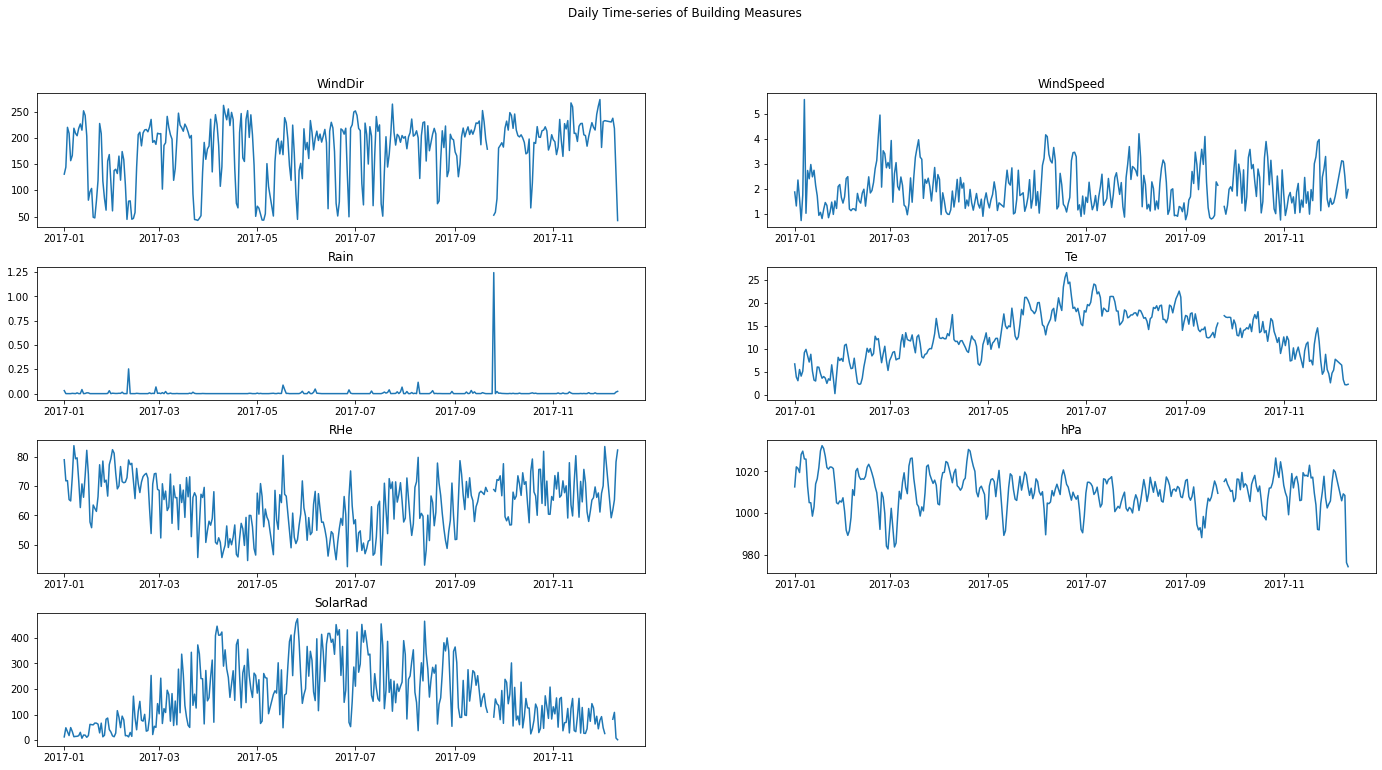

In [48]:
nrows=4
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==7:
            break
        axs[i,j].plot(df2plot.iloc[:,count])
        axs[i,j].title.set_text(df2plot.iloc[:,count].name)
        count += 1
fig.delaxes(axs[3,1])        
fig.suptitle('Daily Time-series of Building Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()

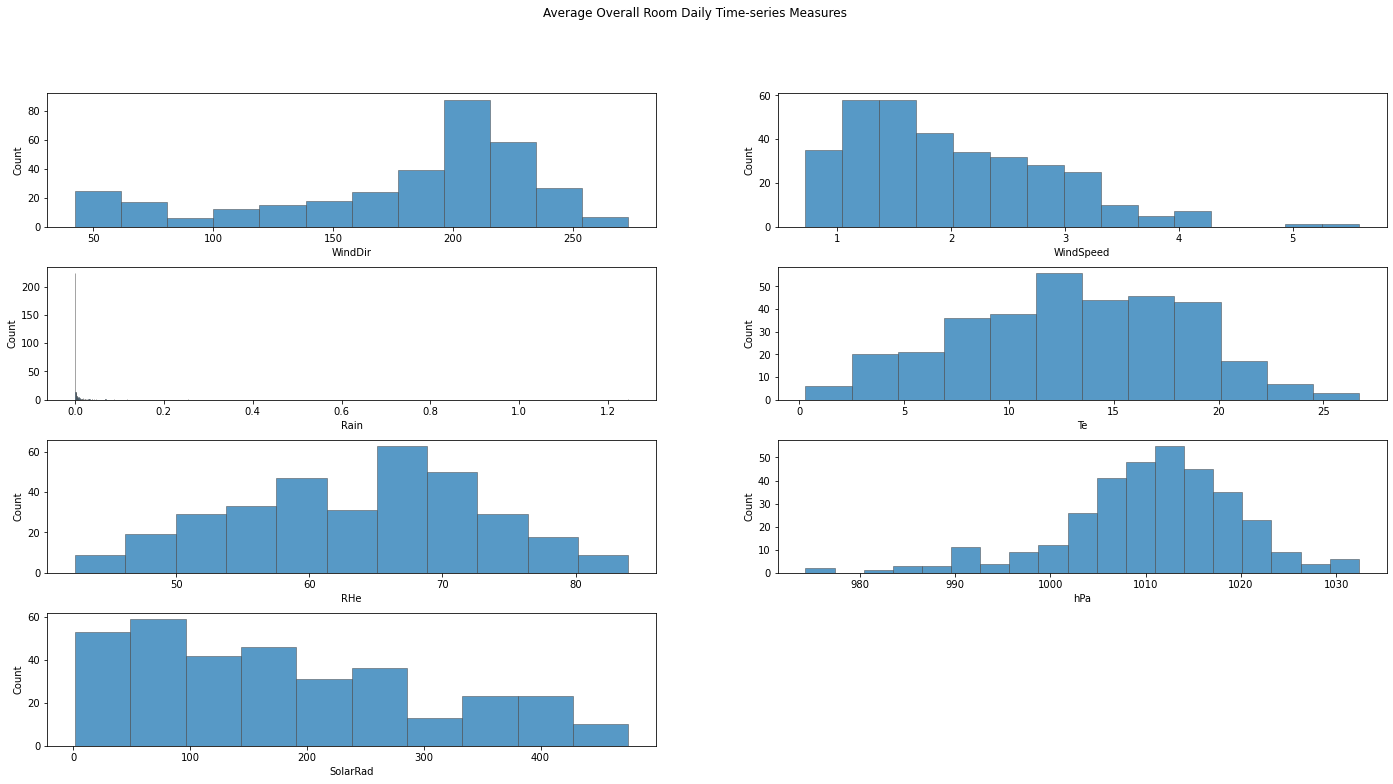

In [49]:
df2plot=df_building.iloc[:,6:].groupby(df_building.index.date).mean().rename(columns={"index":"date"})

nrows=4
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==7:
            break

        sns.histplot(
            df2plot,
            x=df2plot.columns[count],
#             hue="room",
            multiple="stack",
#             palette="light:m_r",
            edgecolor=".3",
            linewidth=.5,
            ax=axs[i,j]
        )
#         axs[i,j].title.set_text(df2plot.iloc[:,count].name)
#         axs[i,j].legend(list(df2plot.iloc[:,0].unstack(1).columns), loc ="upper left")
        count += 1
        
fig.delaxes(axs[3,1])        
fig.suptitle('Average Overall Room Daily Time-series Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()



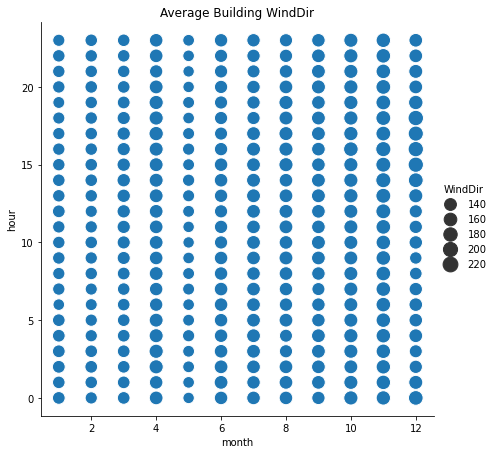

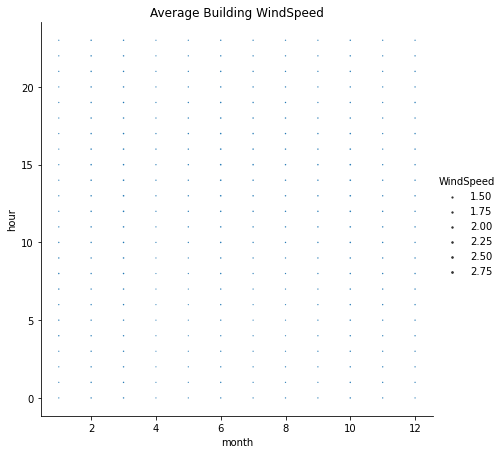

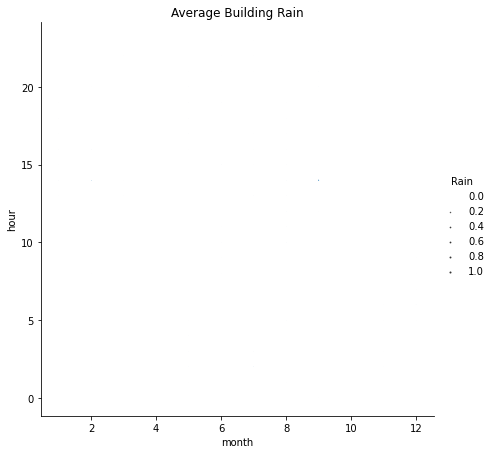

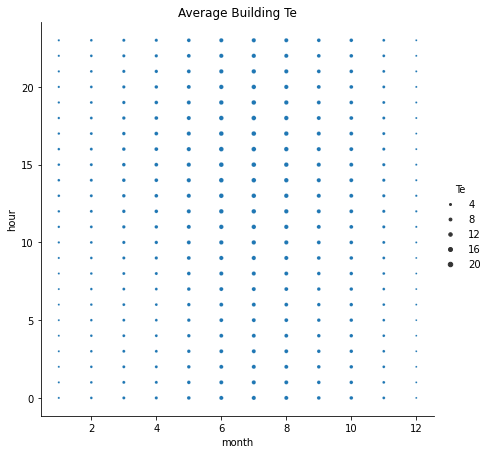

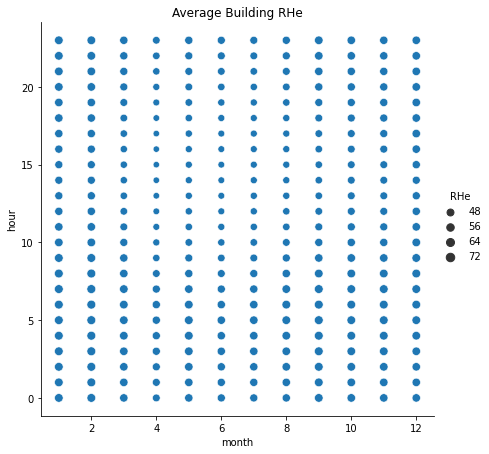

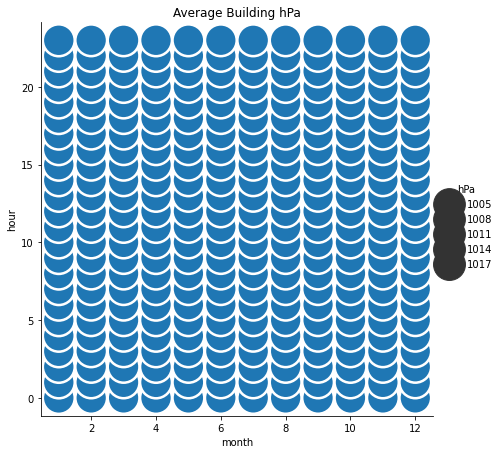

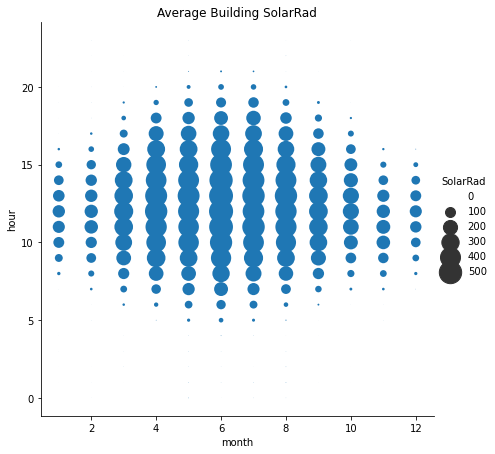

In [50]:
df2plot=df_building.copy()

for var in list(df2plot.columns[6:]):
    sns.relplot(x="month", y="hour",
    #             hue=var,
                size=var,
#                 col="isWorking",
                sizes=tuple(c[0] for c in list(df2plot.groupby(["month","hour"])[var].mean().to_frame().agg([min, max]).values)),
#                 alpha=.5,
                palette="muted",
                height=6, data=df2plot.groupby(["month","hour"])[var].mean().to_frame().reset_index())
    plt.title("Average Building {}".format(var))
    plt.show()

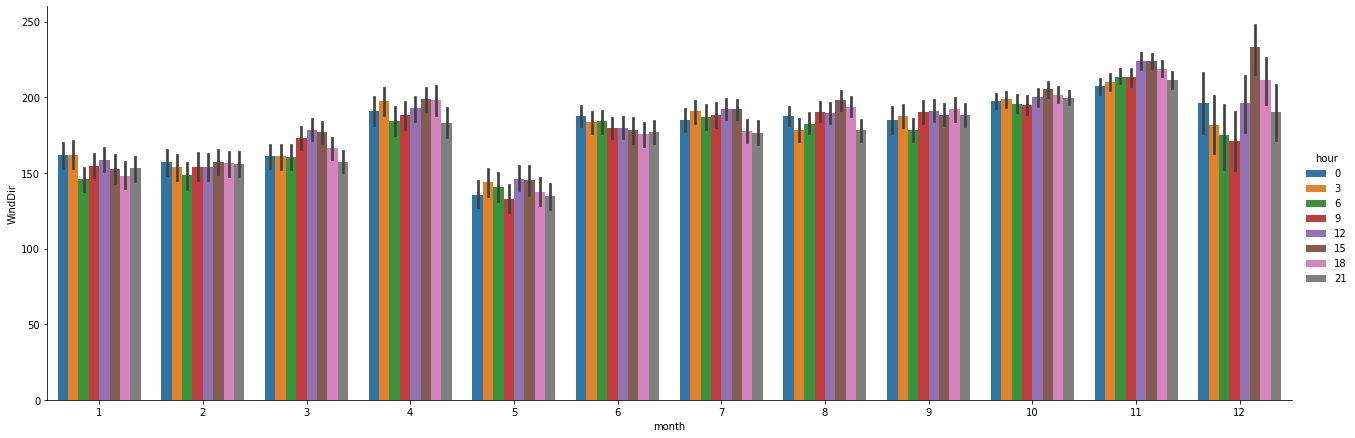

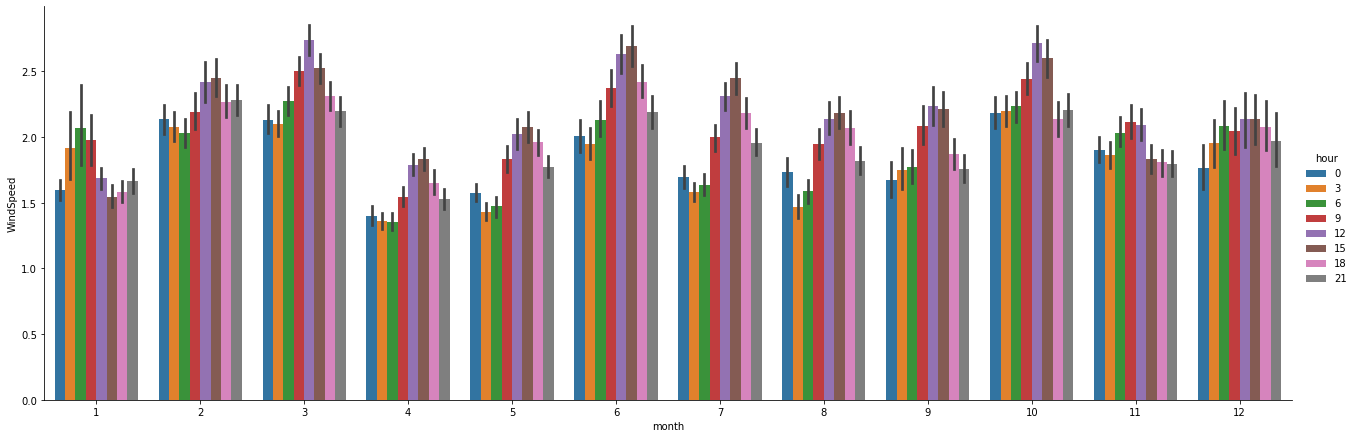

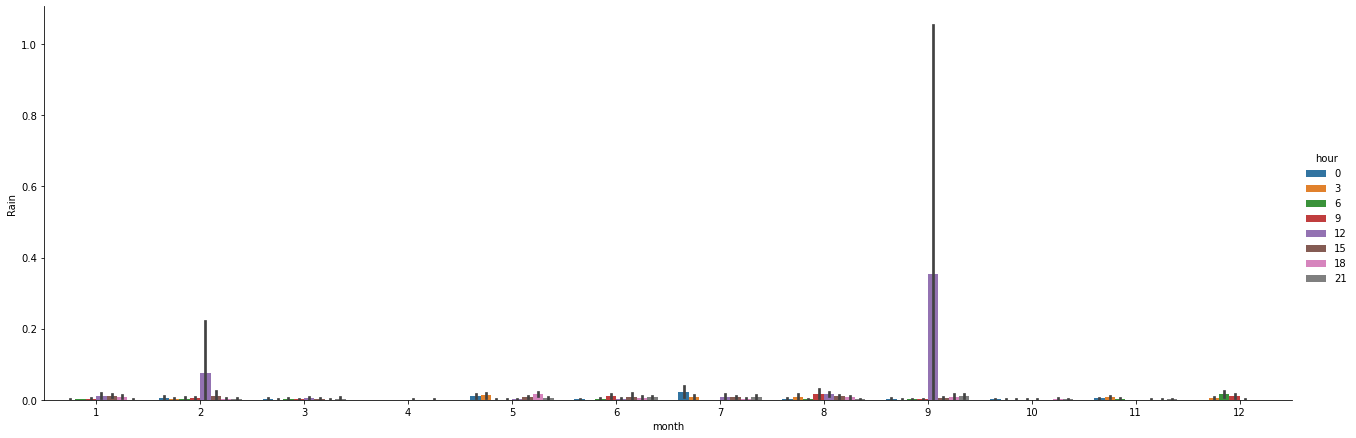

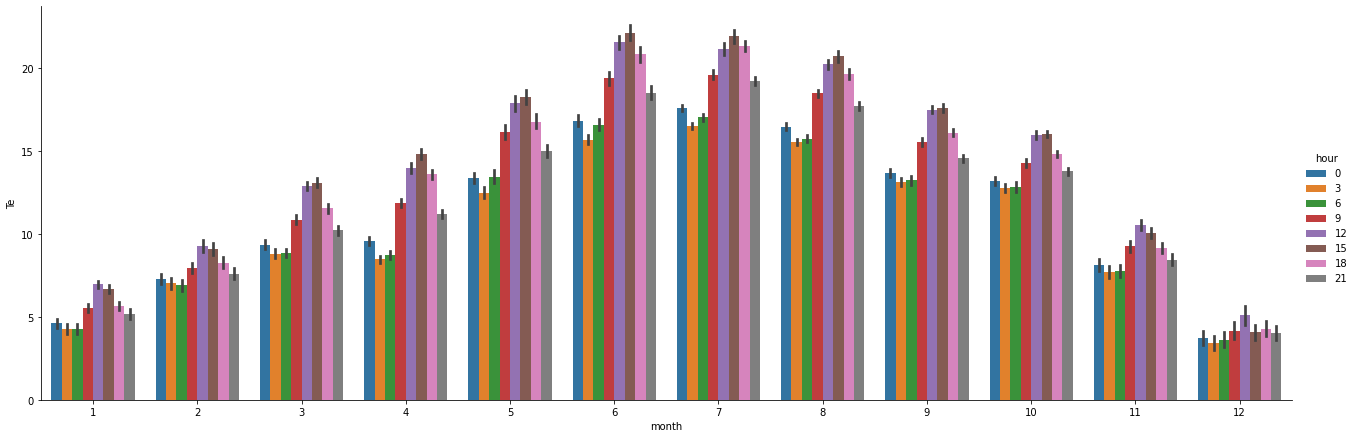

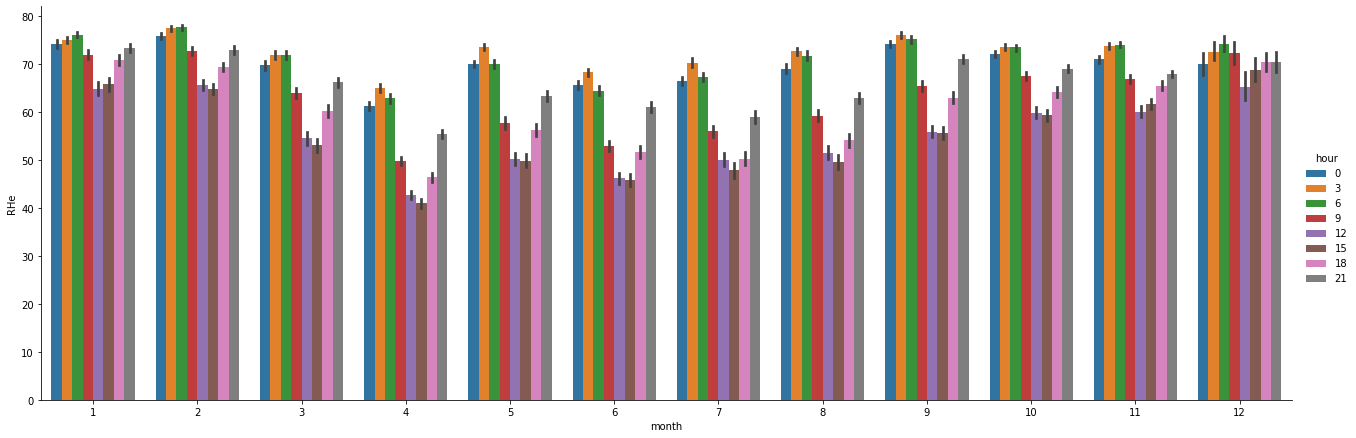

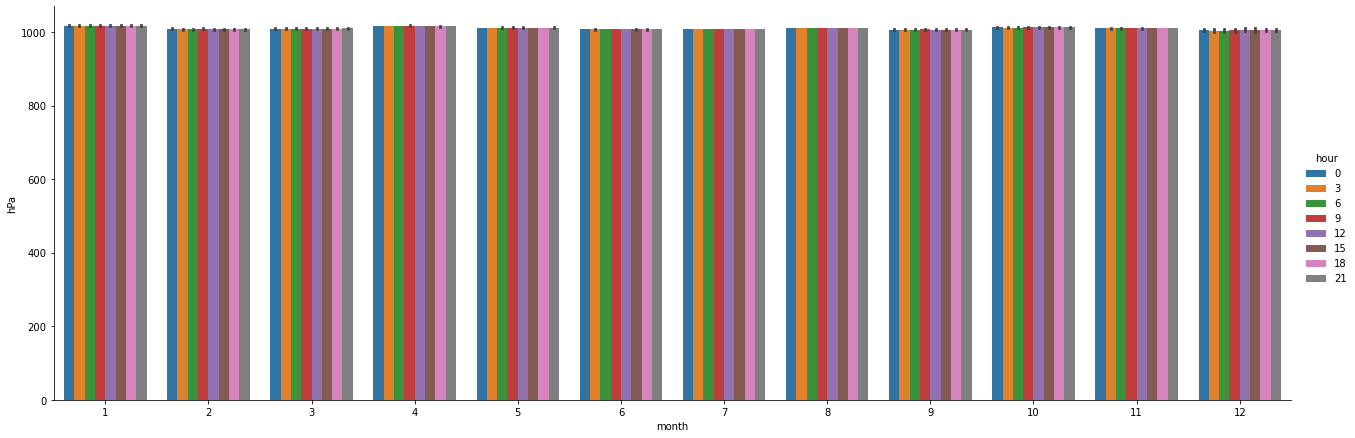

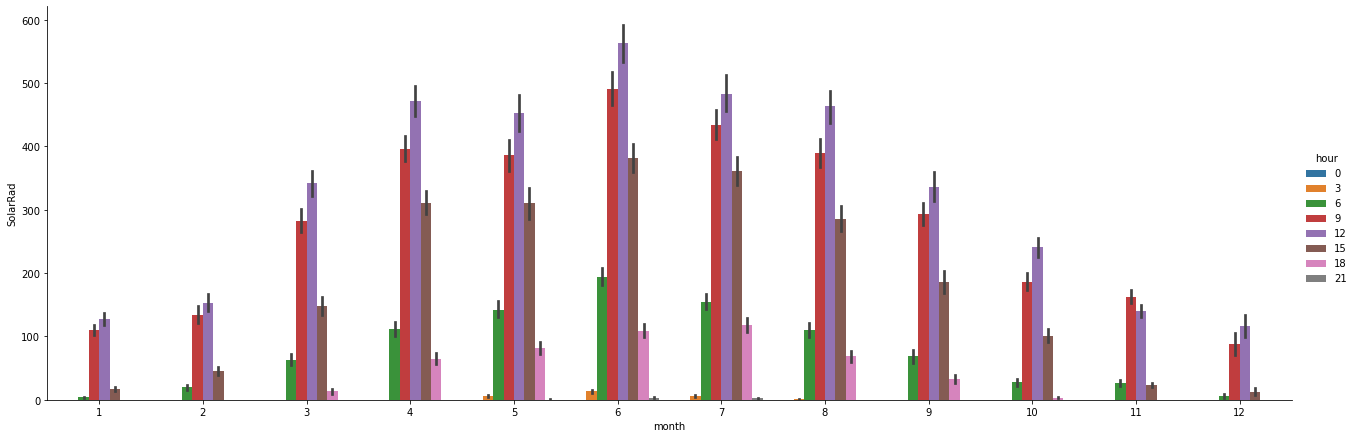

In [51]:
df2plot=df_building.copy()
groups=3
df2plot["hour"]=((df_building["hour"]//groups)*groups)
df2plot

for var in list(df2plot.columns[6:]):

    g = sns.catplot(
        data=df2plot, kind="bar",
    #     col="month",
    #     row="month",
        x="month",
        y=var,
        hue="hour",
#         palette="dark",
        height=6, aspect=3
    )
#     g.despine(left=True)
    plt.show()

In [52]:
# df2plot=df_building.copy()
# hour_groups=6
# df2plot["hour"]=((df_building["hour"]//hour_groups)*hour_groups)
# month_groups=3
# df2plot["month"]=((df_building["month"]//month_groups)*month_groups)

# sns.displot(
#     df2plot, x="WindDir", col="month", row="hour",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# plt.show()

### Overall Rooms stats

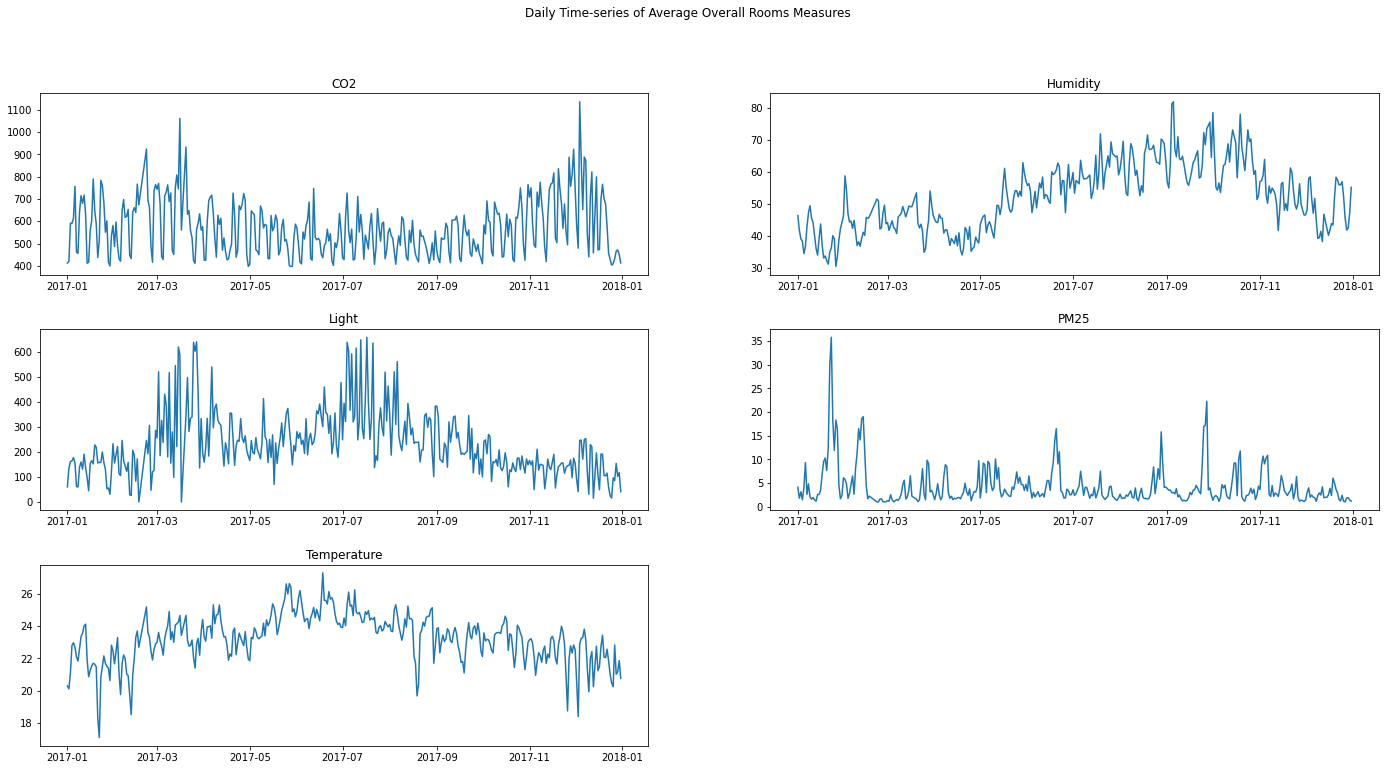

In [53]:
df2plot=df_rooms.iloc[:,6:].groupby(df_rooms.index.date).mean().rename(columns={"index":"date"})

nrows=3
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==5:
            break
        axs[i,j].plot(df2plot.iloc[:,count])
        axs[i,j].title.set_text(df2plot.iloc[:,count].name)
        count += 1
fig.delaxes(axs[2,1])        
fig.suptitle('Daily Time-series of Average Overall Rooms Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()

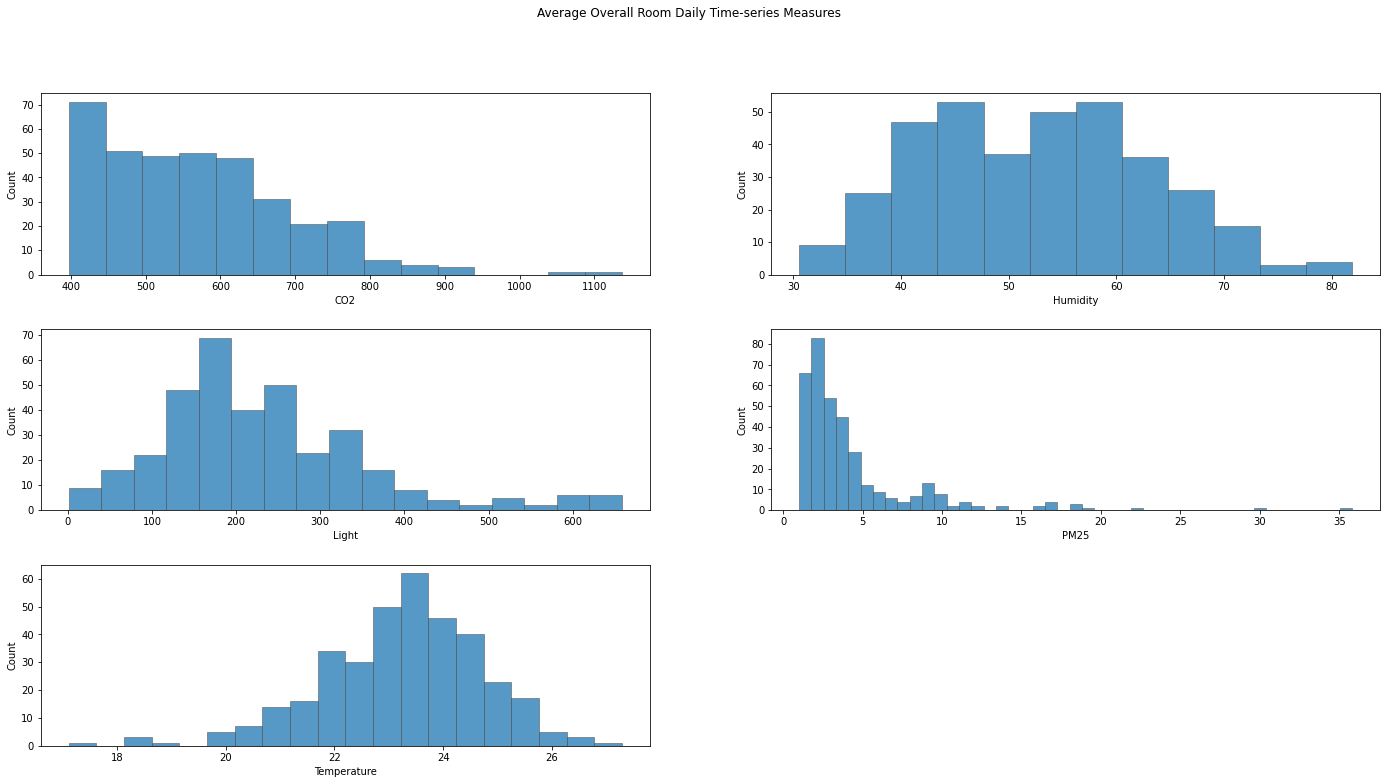

In [54]:
df2plot=df_rooms.iloc[:,6:].groupby(df_rooms.index.date).mean().rename(columns={"index":"date"})

nrows=3
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==5:
            break

        sns.histplot(
            df2plot,
            x=df2plot.columns[count],
#             hue="room",
            multiple="stack",
            palette="light:m_r",
            edgecolor=".3",
            linewidth=.5,
            ax=axs[i,j]
        )
#         axs[i,j].title.set_text(df2plot.iloc[:,count].name)
#         axs[i,j].legend(list(df2plot.iloc[:,0].unstack(1).columns), loc ="upper left")
        count += 1
        
fig.delaxes(axs[2,1])        
fig.suptitle('Average Overall Room Daily Time-series Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()



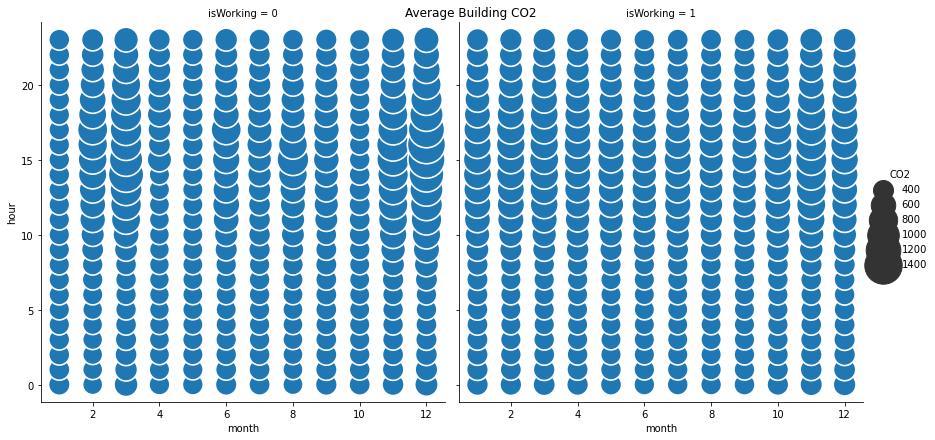

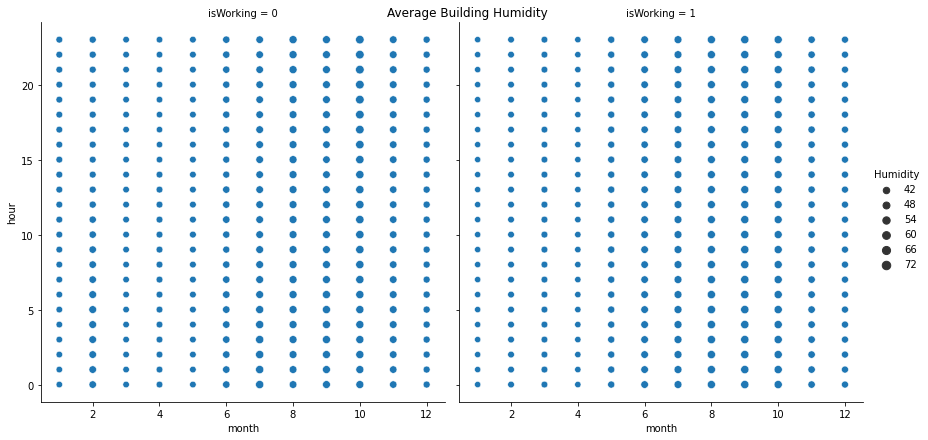

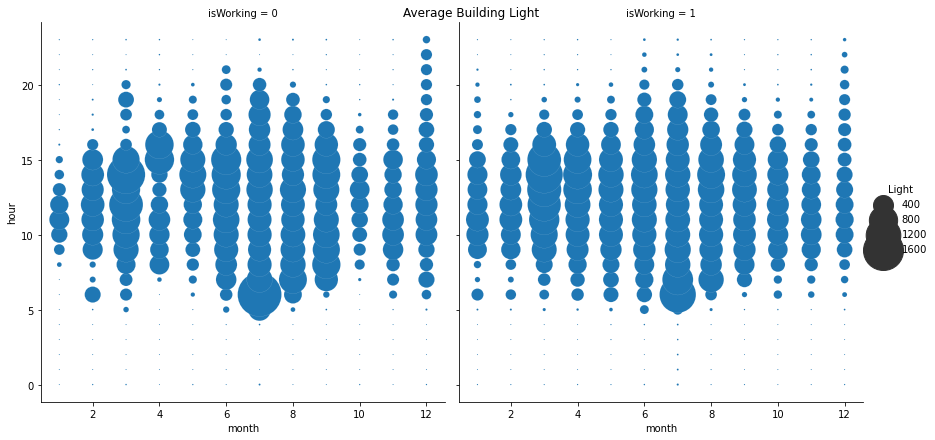

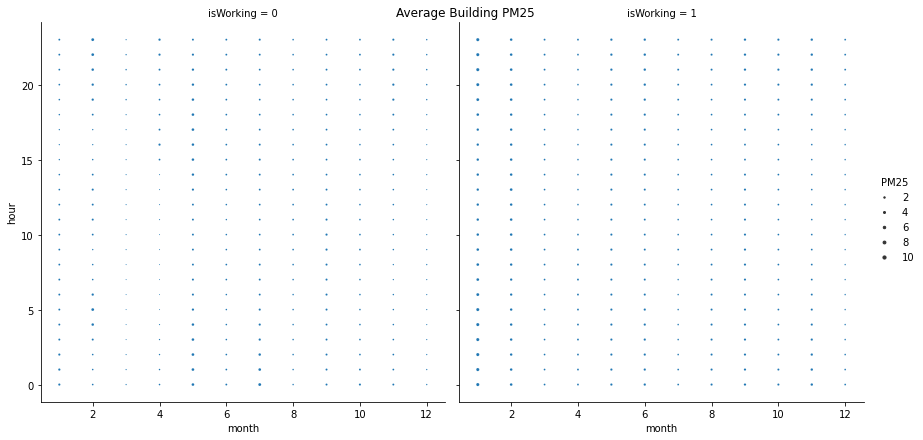

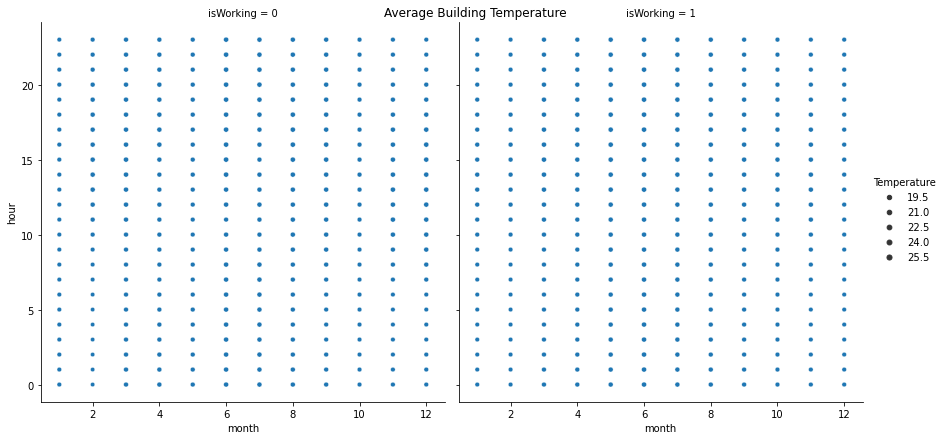

In [55]:
df2plot=df_rooms.copy()

for var in list(df2plot.columns[6:]):
    sns.relplot(x="month", y="hour",
    #             hue=var,
                size=var,
                col="isWorking",
                sizes=tuple(c[0] for c in list(df2plot.groupby(["month","hour","isWorking"])[var].mean().to_frame().agg([min, max]).values)),
#                 alpha=.5,
                palette="muted",
                height=6, data=df2plot.groupby(["month","hour","isWorking"])[var].mean().to_frame().reset_index())
    plt.suptitle("Average Building {}".format(var))
    plt.show()

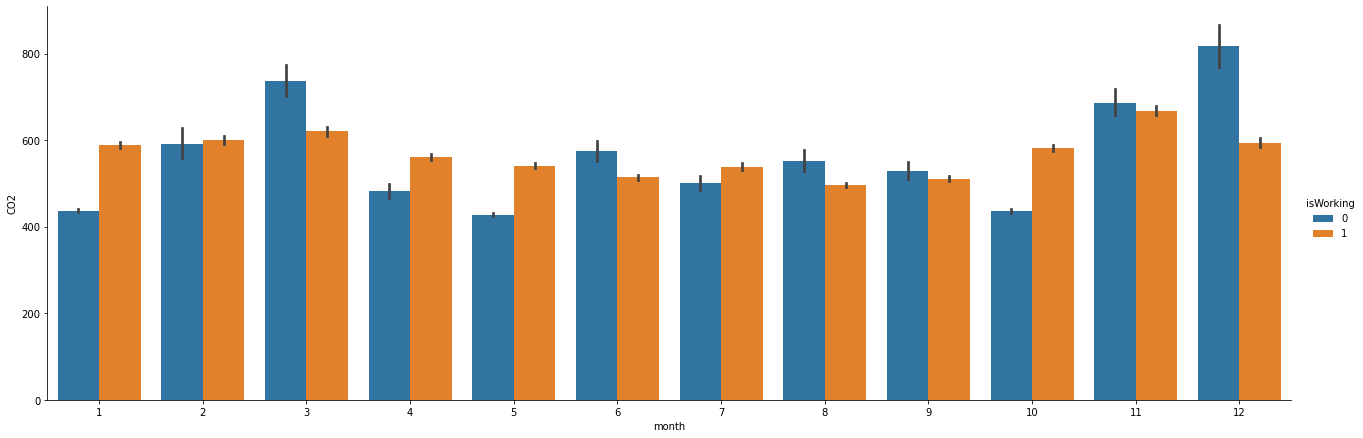

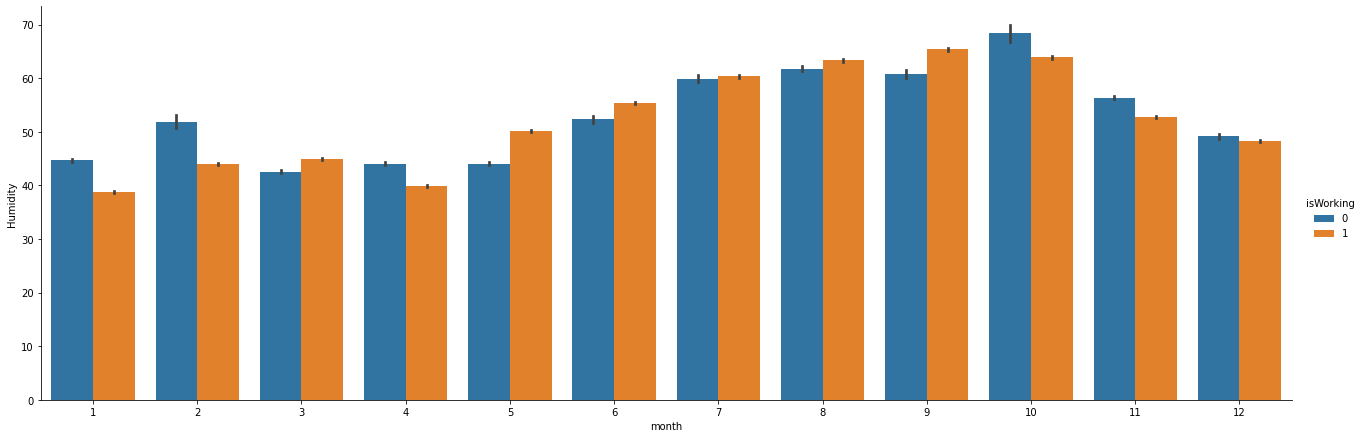

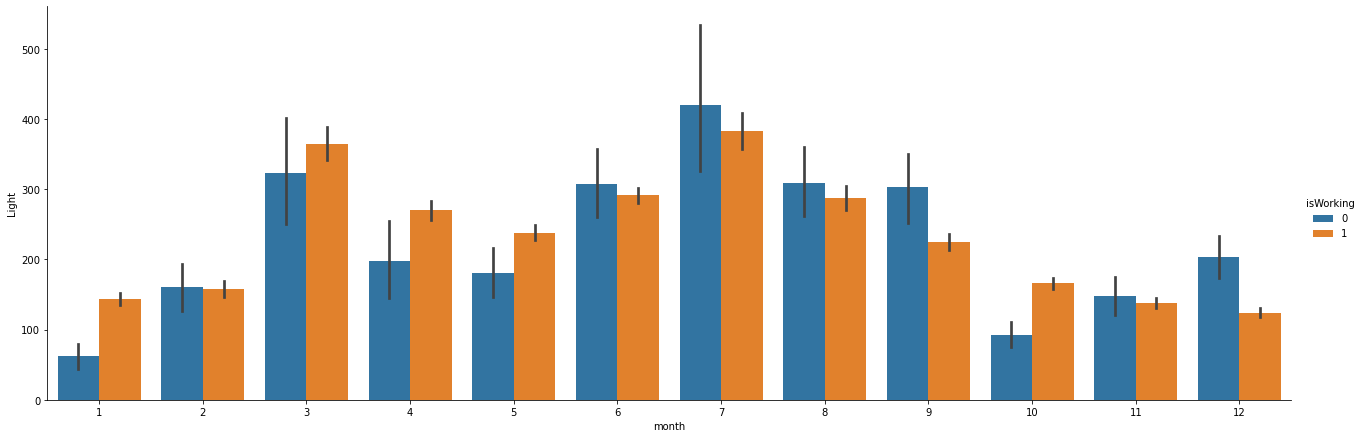

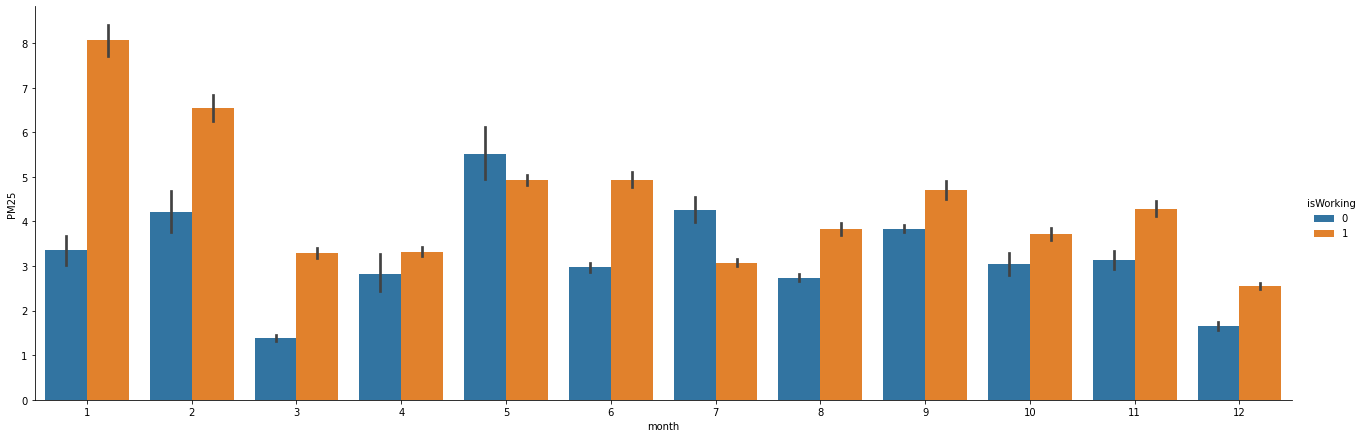

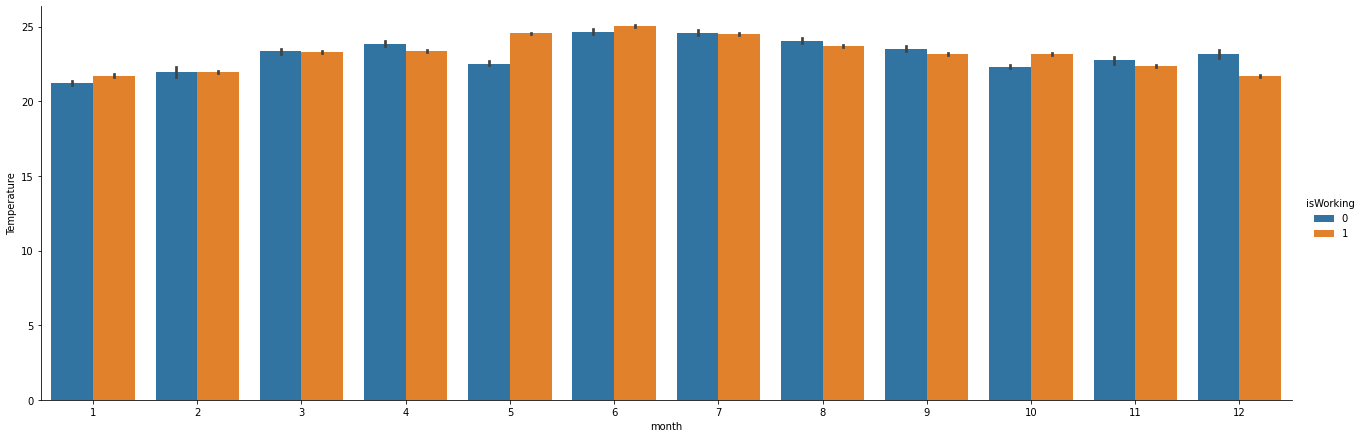

In [56]:
df2plot=df_rooms.copy()
groups=3
df2plot["hour"]=((df2plot["hour"]//groups)*groups)
df2plot

for var in list(df2plot.columns[6:]):

    g = sns.catplot(
        data=df2plot, kind="bar",
#         col="month",
    #     row="month",
        x="month",
        y=var,
        hue="isWorking",
#         palette="dark",
        height=6, aspect=3
    )
#     g.despine(left=True)
    plt.show()

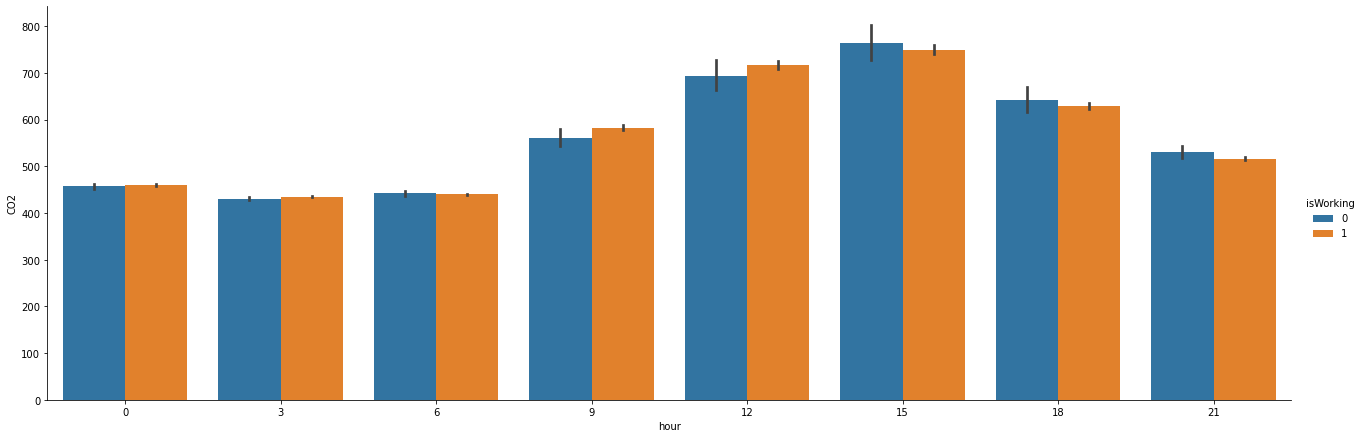

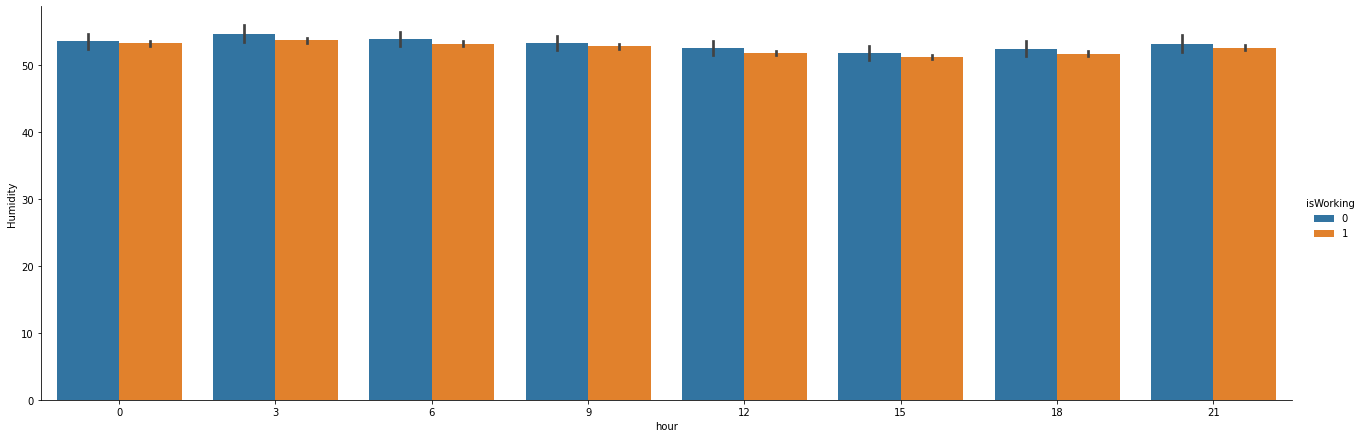

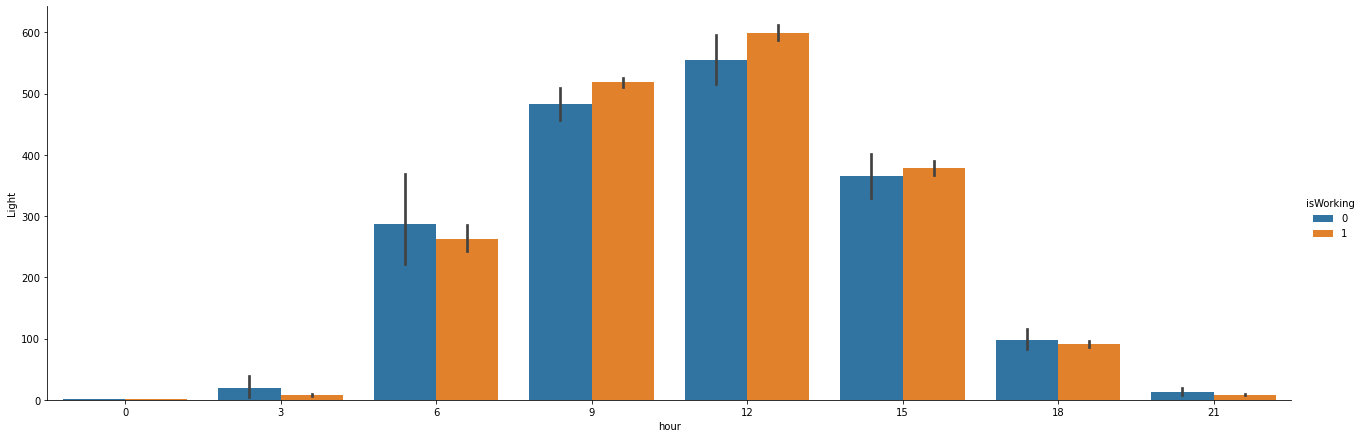

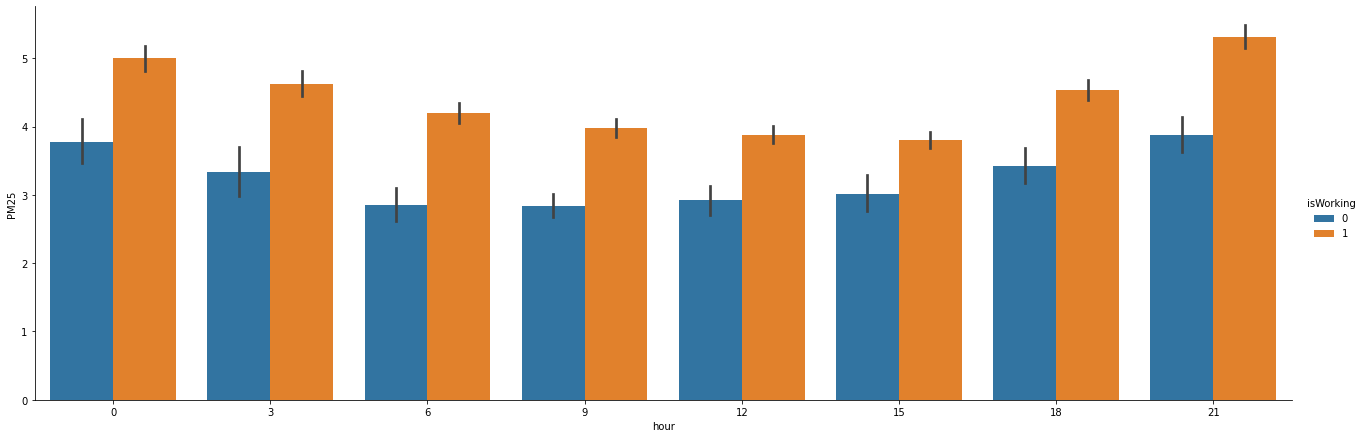

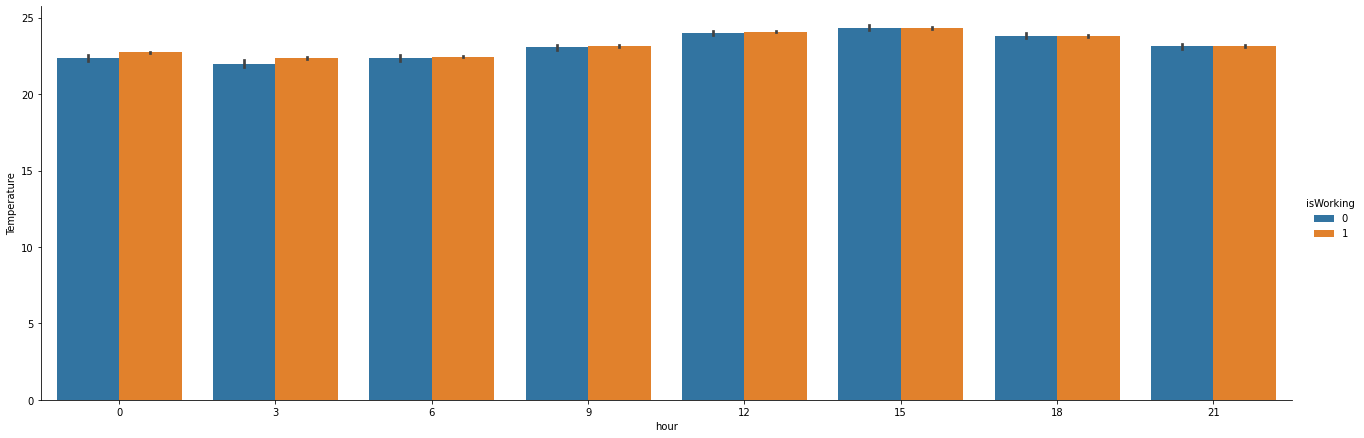

In [57]:
df2plot=df_rooms.copy()
groups=3
df2plot["hour"]=((df2plot["hour"]//groups)*groups)
df2plot

for var in list(df2plot.columns[6:]):

    g = sns.catplot(
        data=df2plot, kind="bar",
#         col="month",
    #     row="month",
        x="hour",
        y=var,
        hue="isWorking",
#         palette="dark",
        height=6, aspect=3
    )
#     g.despine(left=True)
    plt.show()

### Single Rooms stats

In [58]:
df2plot=df_single_rooms.copy().reset_index()
df2plot["Timestamp"]=df2plot["Timestamp"].dt.date
df2plot.set_index(["Timestamp","room"], inplace=True)
df2plot=df2plot.iloc[:,6:].groupby(level=[0,1]).mean().unstack(1).stack()
df2plot

measure                   CO2   Humidity       Light      PM25  Temperature
Timestamp  room                                                            
2017-01-01 CH_418  412.309375  46.390035   61.259201  4.131076    20.304635
2017-01-02 CH_418  419.713889  41.784097  135.059722  1.802083    20.123889
2017-01-03 CH_418  591.118391  39.132375  161.954023  3.165134    21.082375
2017-01-04 CH_418  590.233160  38.374418  165.068142  1.487500    22.794045
2017-01-05 CH_418  612.977951  34.531128  178.277778  4.097396    22.973681
...                       ...        ...         ...       ...          ...
2017-12-30 CH_416  426.654167  61.072749   93.717882  1.240278    18.244838
           CH_418  472.766667  43.068160   36.334896  1.341840    23.035399
2017-12-31 CH_413  405.150868  47.539288   49.791667  1.310069    21.763316
           CH_416  406.575000  68.600833   57.921528  1.073611    18.535139
           CH_418  426.279861  49.438056   18.425000  1.127083    22.004583

[601 rows x 5 columns]

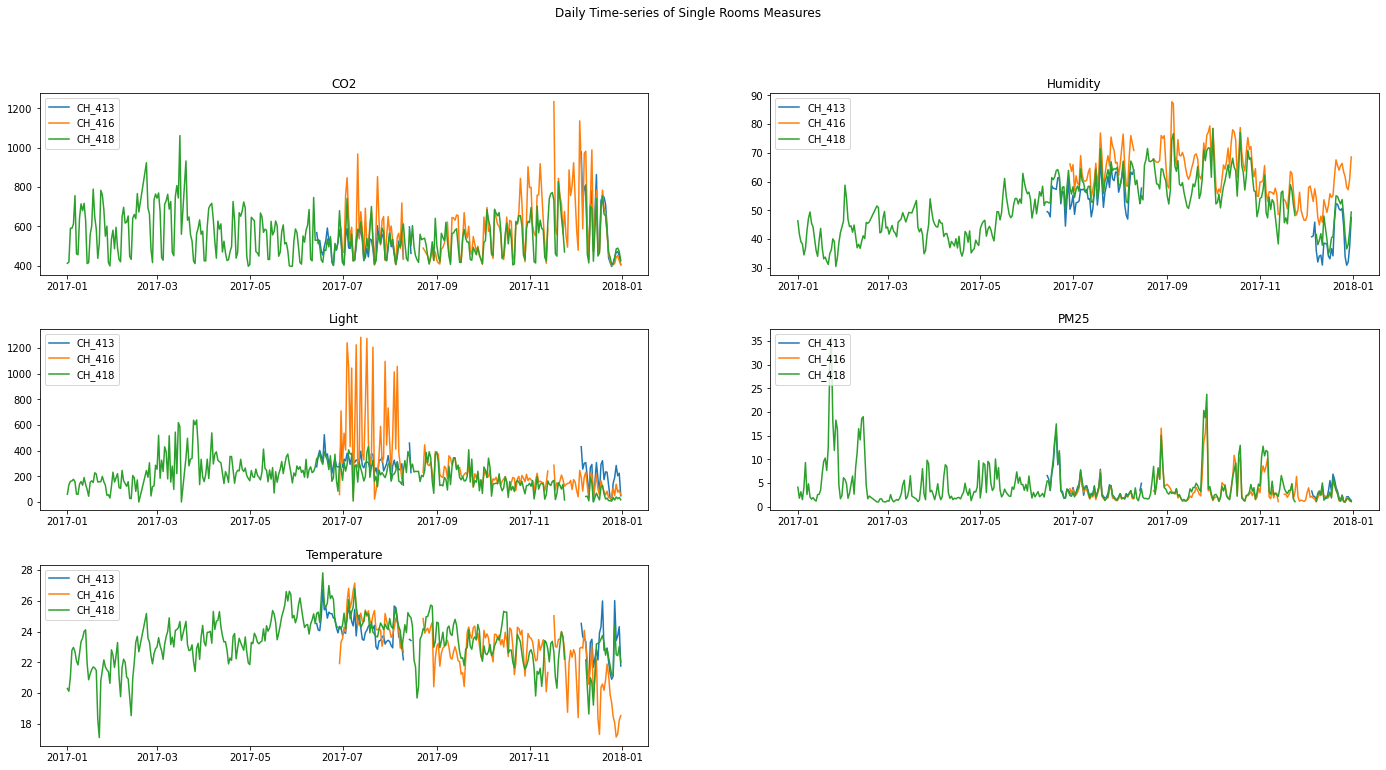

In [59]:
nrows=3
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==5:
            break
        axs[i,j].plot(df2plot.iloc[:,count].unstack(1))
        axs[i,j].title.set_text(df2plot.iloc[:,count].name)
        axs[i,j].legend(list(df2plot.iloc[:,0].unstack(1).columns), loc ="upper left")
        count += 1
fig.delaxes(axs[2,1])        
fig.suptitle('Daily Time-series of Single Rooms Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()

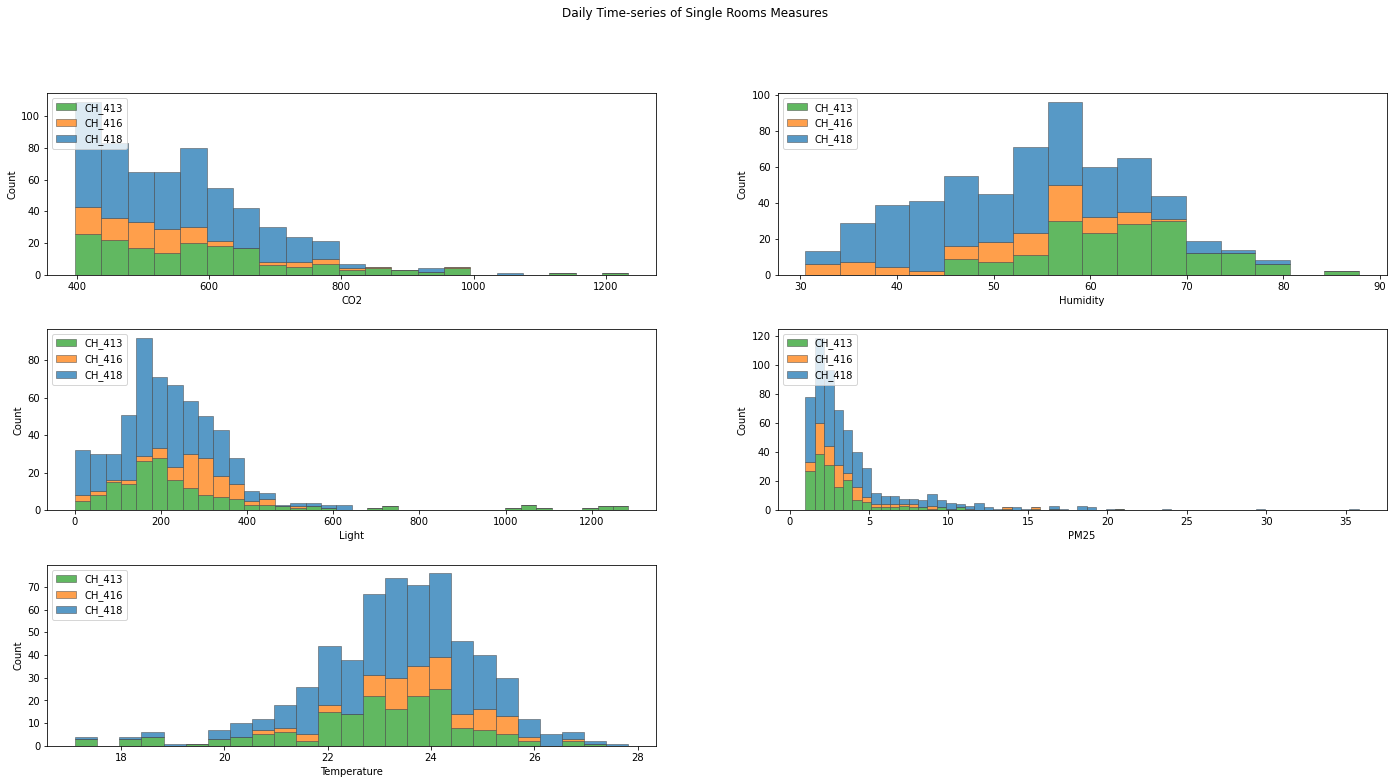

In [60]:
nrows=3
ncols=2
fig, axs = plt.subplots(nrows,ncols, figsize=(24,12))

count = 0
for i in range(nrows):
    for j in range(ncols):
#         print(count)
        if count==5:
            break

        sns.histplot(
            df2plot,
            x=df2plot.columns[count],
            hue="room",
            multiple="stack",
#             palette="light:m_r",
            edgecolor=".3",
            linewidth=.5,
            ax=axs[i,j]
        )
#         axs[i,j].title.set_text(df2plot.iloc[:,count].name)
        axs[i,j].legend(list(df2plot.iloc[:,0].unstack(1).columns), loc ="upper left")
        count += 1
        
fig.delaxes(axs[2,1])        
fig.suptitle('Daily Time-series of Single Rooms Measures') 
fig.subplots_adjust(hspace=0.3)

plt.show()

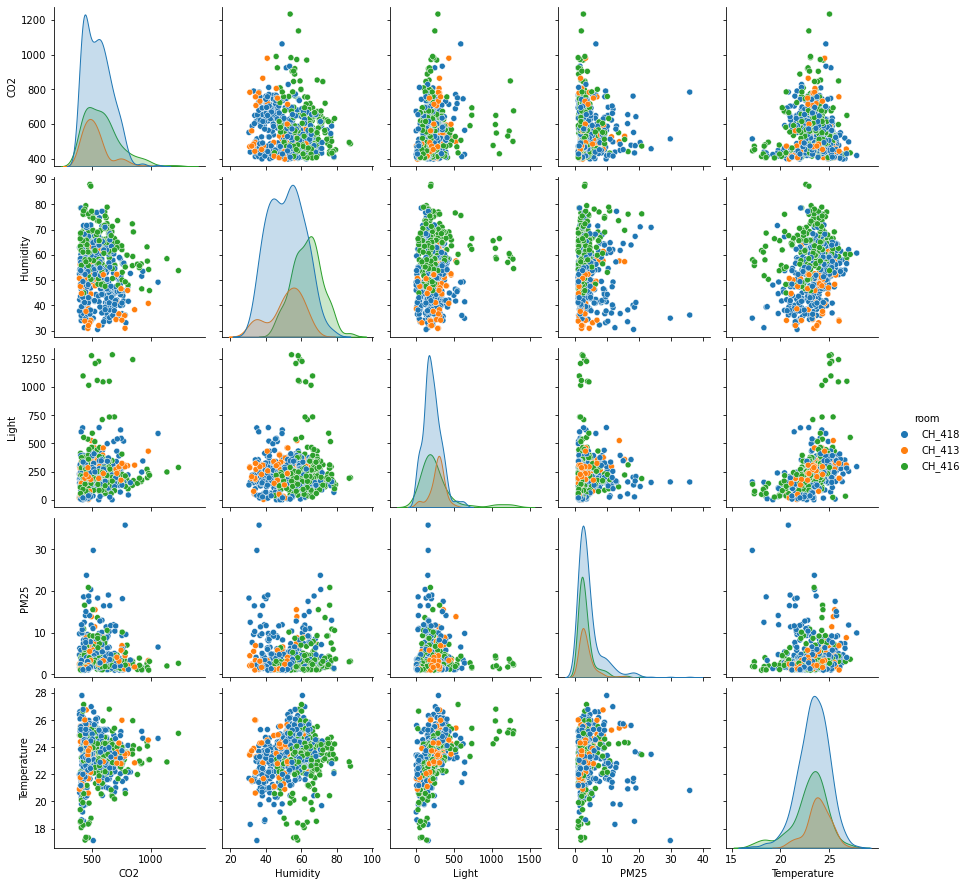

In [61]:
sns.pairplot(df2plot.reset_index().iloc[:,1:], hue="room")

### Variations between outdoor monitoring stations

In [62]:
df_outdoor.iloc[:,6:]

,PM2.5 Bloomsbury,NO2 Bloomsbury,PM2.5 Euston Road,NO2 Euston Road
Timestamp,,,,
2017-01-01 00:00:00,30.8,10.8,28.7,71.8
2017-01-01 00:15:00,30.8,10.8,28.7,79.0
2017-01-01 00:30:00,30.8,10.8,28.7,109.4
2017-01-01 00:45:00,30.8,10.8,28.7,102.0
2017-01-01 01:00:00,22.9,17.3,26.4,100.9
...,...,...,...,...
2017-12-31 22:45:00,8.4,22.5,5.7,92.1
2017-12-31 23:00:00,9.9,20.7,5.4,78.9
2017-12-31 23:15:00,9.9,20.7,5.4,74.4


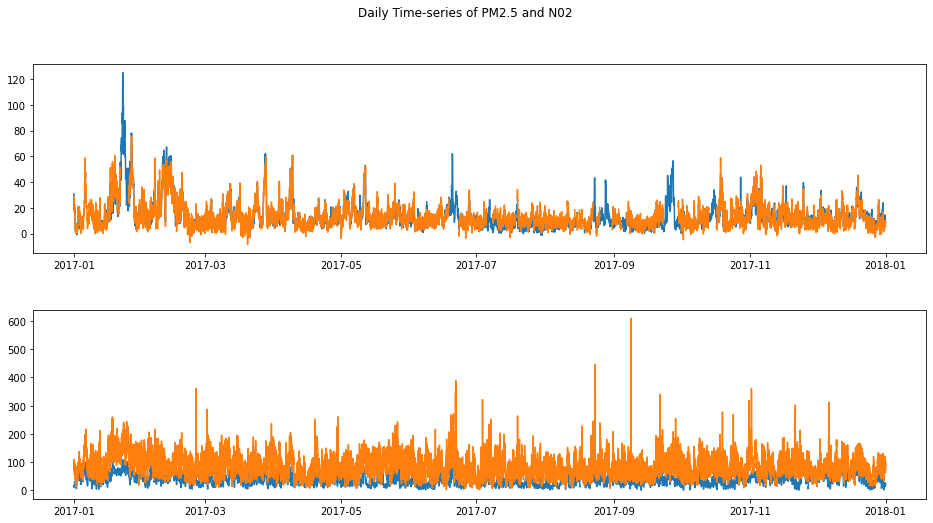

In [63]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8))
fig.suptitle('Daily Time-series of PM2.5 and N02') 
ax1.plot(df_outdoor.index, df_outdoor.loc[:,["PM2.5 Bloomsbury","PM2.5 Euston Road"]])
ax2.plot(df_outdoor.index, df_outdoor.loc[:,["NO2 Bloomsbury","NO2 Euston Road"]])

fig.subplots_adjust(hspace=0.3)
plt.show()

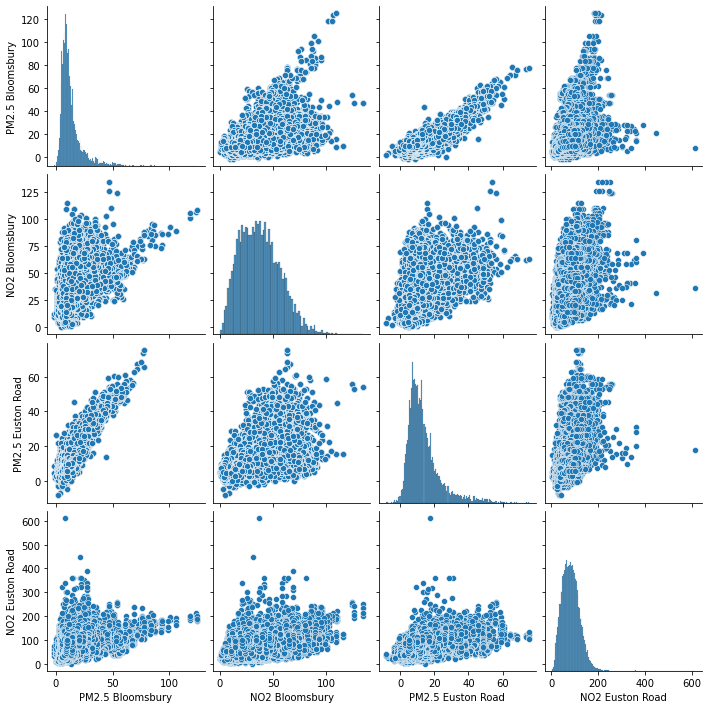

In [64]:
sns.pairplot(df_outdoor.iloc[:,6:], diag_kind="hist")

In [65]:
df2plot=df_outdoor.copy()
groups=3
df2plot["hour"]=((df2plot["hour"]//groups)*groups)
month_groups=4
df2plot["month"]=((df2plot["month"]//month_groups)*month_groups)

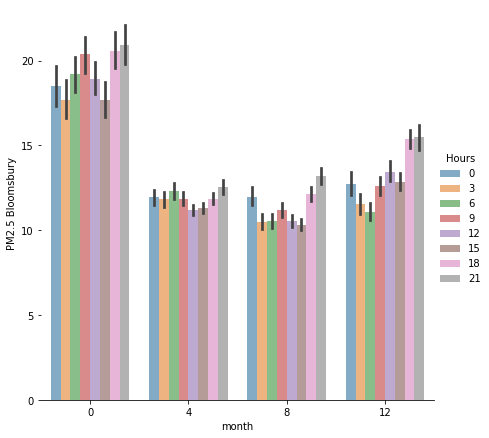

In [66]:
g = sns.catplot(
    data=df2plot, kind="bar",
    x="month", y="PM2.5 Bloomsbury", hue="hour",
    alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "PM2.5 Bloomsbury")
g.set_titles("PM2.5 Bloomsbury")
g.legend.set_title("Hours")

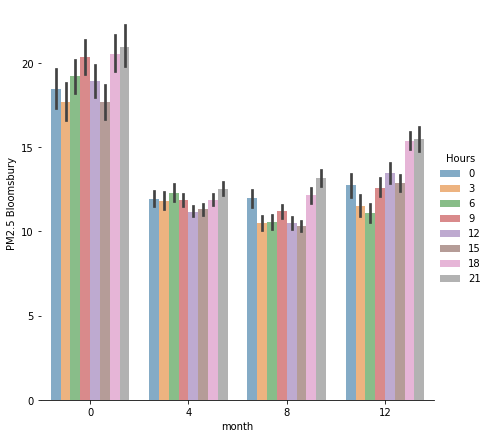

In [67]:
g = sns.catplot(
    data=df2plot, kind="bar",
    x="month", y="PM2.5 Bloomsbury", hue="hour",
    alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "PM2.5 Bloomsbury")
g.set_titles("PM2.5 Euston")
g.legend.set_title("Hours")

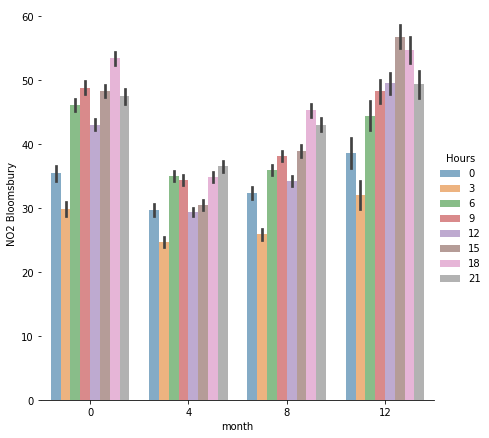

In [68]:
g = sns.catplot(
    data=df2plot, kind="bar",
    x="month", y="NO2 Bloomsbury", hue="hour",
    alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "PM2.5 Bloomsbury")
g.set_titles("NO2 Bloomsbury")
g.legend.set_title("Hours")

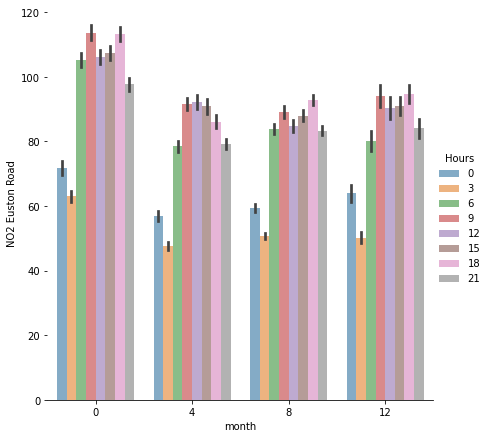

In [69]:
g = sns.catplot(
    data=df2plot, kind="bar",
    x="month", y="NO2 Euston Road", hue="hour",
    alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "PM2.5 Bloomsbury")
g.set_titles("NO2 Euston Road")
g.legend.set_title("Hours")

### Indoor vs Outdoor concentrations

#### PM2.5

In [70]:
dfpm25=df.loc[:,list(df.iloc[:,:6].columns)+[c for c in df.columns if "PM2" in c]]

In [71]:
dfpm25.iloc[:,-5:].corr()

,PM2.5 Bloomsbury,PM2.5 Euston Road,CH_418_PM25,CH_416_PM25,CH_413_PM25
PM2.5 Bloomsbury,1.000000,0.879049,0.858632,0.752593,0.712570
PM2.5 Euston Road,0.879049,1.000000,0.789770,0.638276,0.631440
CH_418_PM25,0.858632,0.789770,1.000000,0.922945,0.967996
CH_416_PM25,0.752593,0.638276,0.922945,1.000000,0.839521
CH_413_PM25,0.712570,0.631440,0.967996,0.839521,1.000000


In [72]:
dfpm25io=pd.concat([dfpm25.loc[:,["PM2.5 Bloomsbury","PM2.5 Euston Road"]].mean(axis=1).to_frame("outdoor"),dfpm25.loc[:,["CH_418_PM25","CH_416_PM25","CH_413_PM25"]].mean(axis=1).to_frame("indoor")], axis=1)
dfpm25io.describe()

,outdoor,indoor
count,34960.000000,33793.000000
mean,13.840558,4.338182
std,10.743039,4.814885
min,-3.400000,1.000000
25%,7.600000,1.683333
50%,10.750000,2.733333
75%,16.100000,4.866667
max,125.100000,57.200000


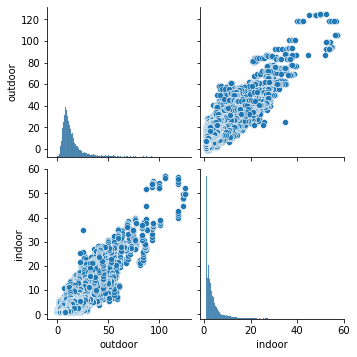

In [73]:
sns.pairplot(dfpm25io, diag_kind="hist")

#### Outdoor PM2.5 vs Indoor C02

In [74]:
dfco2pm25=df.loc[:,[c for c in df.columns if "PM2.5" in c]+[c for c in df.columns if "CO2" in c]]
dfco2pm25.corr()

,PM2.5 Bloomsbury,PM2.5 Euston Road,CH_418_CO2,CH_416_CO2,CH_413_CO2
PM2.5 Bloomsbury,1.000000,0.879049,0.084432,0.052334,0.210044
PM2.5 Euston Road,0.879049,1.000000,0.170881,0.174351,0.329488
CH_418_CO2,0.084432,0.170881,1.000000,0.751149,0.847060
CH_416_CO2,0.052334,0.174351,0.751149,1.000000,0.718741
CH_413_CO2,0.210044,0.329488,0.847060,0.718741,1.000000


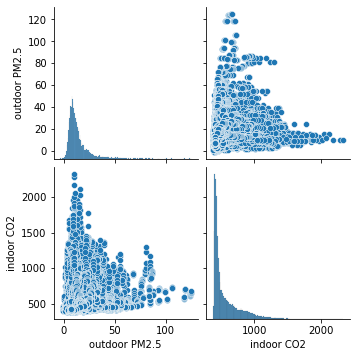

In [75]:
dfco2pm25_mean=pd.concat([dfco2pm25.loc[:,["PM2.5 Bloomsbury","PM2.5 Euston Road"]].mean(axis=1).to_frame("outdoor PM2.5"),dfco2pm25.loc[:,["CH_418_CO2","CH_416_CO2","CH_413_CO2"]].mean(axis=1).to_frame("indoor CO2")], axis=1)
sns.pairplot(dfco2pm25_mean, diag_kind="hist")

### Comparisons between Pollutants

In [76]:
df_pollutants=pd.concat([df.loc[:,list([c for c in df.columns if "PM25" in c])].mean(axis=1).to_frame("indoor PM2.5"),
                          df.loc[:,list([c for c in df.columns if "CO2" in c])].mean(axis=1).to_frame("indoor CO2"),
                         df.loc[:,list([c for c in df.columns if "PM2.5" in c])].mean(axis=1).to_frame("outdoor PM2.5"),
                         df.loc[:,list([c for c in df.columns if "NO2" in c])].mean(axis=1).to_frame("outdoor NO2"),
                         ], axis=1)
df_pollutants.describe()

,indoor PM2.5,indoor CO2,outdoor PM2.5,outdoor NO2
count,33793.000000,33793.000000,34960.000000,35032.000000
mean,4.338182,566.288039,13.840558,60.415075
std,4.814885,208.390458,10.743039,24.517071
min,1.000000,381.666667,-3.400000,0.400000
25%,1.683333,427.683333,7.600000,43.200000
50%,2.733333,470.933333,10.750000,58.850000
75%,4.866667,637.866667,16.100000,75.600000
max,57.200000,2327.466667,125.100000,323.149995


In [77]:
df2plot=pd.concat([df.iloc[:,:6],df_pollutants], axis=1)

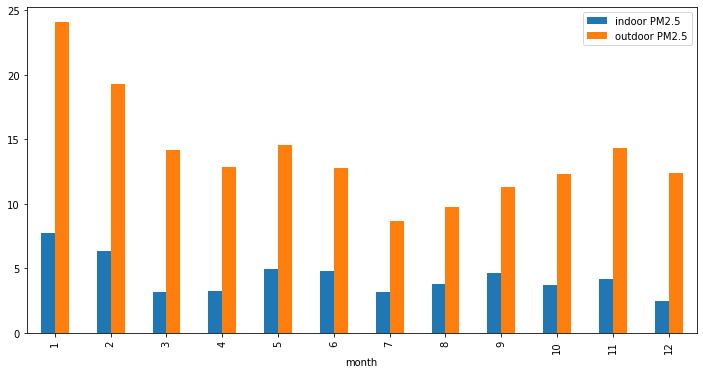

In [78]:
df2plot.groupby(["month"])[["indoor PM2.5","outdoor PM2.5"]].mean().plot.bar(figsize=(12,6))

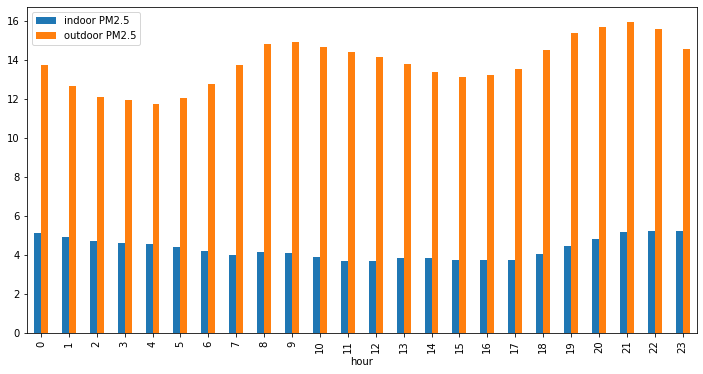

In [79]:
df2plot.groupby(["hour"])[["indoor PM2.5","outdoor PM2.5"]].mean().plot.bar(figsize=(12,6))

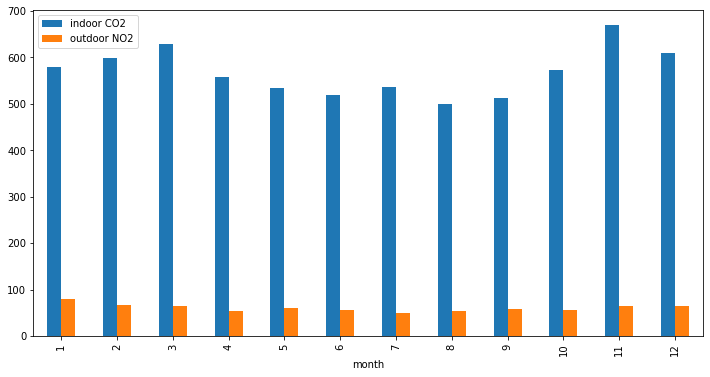

In [80]:
df2plot.groupby(["month"])[["indoor CO2", "outdoor NO2"]].mean().plot.bar(figsize=(12,6))

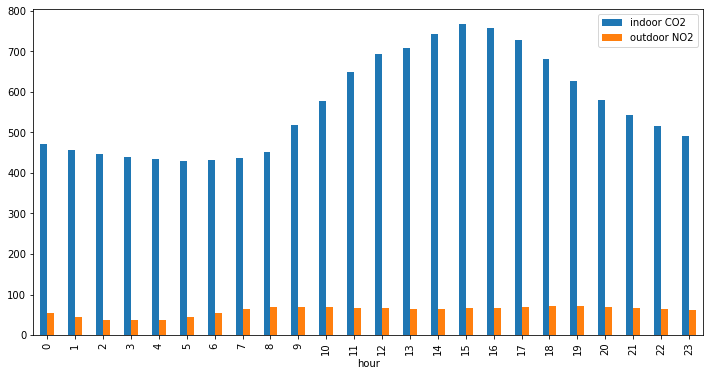

In [81]:
df2plot.groupby(["hour"])[["indoor CO2","outdoor NO2"]].mean().plot.bar(figsize=(12,6))

### Determinants of IAQ

#### Preliminary visualizations and study

In [82]:
df_reg=pd.concat([df.loc[:,["PM2.5 Bloomsbury","PM2.5 Euston Road"]].mean(axis=1).to_frame("outdoor PM2.5"),
           df.loc[:,["NO2 Euston Road","NO2 Bloomsbury"]].mean(axis=1).to_frame("outdoor NO2"),
          df.loc[:,["CH_418_Temperature","CH_416_Temperature","CH_413_Temperature"]].mean(axis=1).to_frame("indoor Temperature"),
          df.loc[:,["CH_418_Humidity","CH_416_Humidity","CH_413_Humidity"]].mean(axis=1).to_frame("indoor Humidity"),
          df.loc[:,["CH_418_PM25","CH_416_PM25","CH_413_PM25"]].mean(axis=1).to_frame("indoor PM25"),
          df.loc[:,["CH_418_CO2","CH_416_CO2","CH_413_CO2"]].mean(axis=1).to_frame("indoor CO2"),
          df.loc[:,["CH_418_Light","CH_416_Light","CH_413_Light"]].mean(axis=1).to_frame("indoor Light"),
          df.iloc[:,6:13]],
          axis=1).dropna(axis=0)
df_reg=df_reg.loc[:,["indoor PM25"]+[c for c in df_reg.columns if c!="indoor PM25"]]
df_reg=df_reg.fillna(method="ffill")
df_reg

,indoor PM25,outdoor PM2.5,outdoor NO2,indoor Temperature,indoor Humidity,indoor CO2,indoor Light,WindDir,WindSpeed,Rain,Te,RHe,hPa,SolarRad
Timestamp,,,,,,,,,,,,,,
2017-01-01 00:00:00,7.466667,29.75,41.30,20.826667,45.066667,426.666667,1.000000,193.333333,2.700000,0.000000,7.566667,76.000000,1018.000000,0.000000
2017-01-01 00:15:00,7.333333,29.75,44.90,20.806667,45.006667,425.000000,1.000000,192.333333,2.166667,0.000000,7.366667,77.000000,1018.000000,0.000000
2017-01-01 00:30:00,7.800000,29.75,60.10,20.726667,45.006667,423.866667,1.000000,190.333333,2.500000,0.000000,7.233333,77.000000,1017.000000,0.000000
2017-01-01 00:45:00,8.400000,29.75,56.40,20.686667,45.140000,422.466667,1.000000,194.000000,2.700000,0.000000,7.100000,77.333333,1017.000000,0.000000
2017-01-01 01:00:00,8.800000,24.65,59.10,20.640000,44.973333,421.933333,1.000000,184.000000,1.733333,0.000000,7.000000,78.000000,1017.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11 09:30:00,1.288889,8.60,63.25,21.595556,42.993333,651.466667,467.133333,41.333333,2.600000,0.066667,3.233333,81.000000,974.000000,6.033333
2017-12-11 09:45:00,1.250000,8.60,69.40,21.787778,43.143519,675.948148,471.607407,34.000000,2.766667,0.066667,3.266667,81.333333,974.333333,9.533333
2017-12-11 10:00:00,1.385185,8.75,65.70,22.084444,43.094074,703.488889,472.200000,33.333333,2.600000,0.100000,3.166667,81.000000,975.000000,9.566667


In [83]:
df_reg.corr().round(4)

,indoor PM25,outdoor PM2.5,outdoor NO2,indoor Temperature,indoor Humidity,indoor CO2,indoor Light,WindDir,WindSpeed,Rain,Te,RHe,hPa,SolarRad
indoor PM25,1.0000,0.8748,0.3910,-0.2377,-0.1245,-0.0408,-0.0870,-0.3133,-0.2358,0.0172,-0.1354,0.1279,0.2321,-0.0934
outdoor PM2.5,0.8748,1.0000,0.5475,-0.2675,-0.2762,0.0814,-0.0636,-0.3594,-0.2419,0.0158,-0.2877,0.1716,0.3009,-0.1167
outdoor NO2,0.3910,0.5475,1.0000,-0.0651,-0.2240,0.2635,0.0411,-0.3003,-0.1433,0.0095,-0.1437,-0.0033,0.2159,-0.0066
indoor Temperature,-0.2377,-0.2675,-0.0651,1.0000,0.2115,0.3221,0.2938,0.1328,0.1222,0.0004,0.6515,-0.4737,-0.0900,0.3514
indoor Humidity,-0.1245,-0.2762,-0.2240,0.2115,1.0000,-0.0933,-0.0148,0.1526,0.1196,0.0154,0.5992,0.1704,-0.2727,0.0254
indoor CO2,-0.0408,0.0814,0.2635,0.3221,-0.0933,1.0000,0.1808,0.1117,0.0681,0.0055,-0.0273,-0.1859,0.0552,0.0894
indoor Light,-0.0870,-0.0636,0.0411,0.2938,-0.0148,0.1808,1.0000,0.0135,0.0400,-0.0010,0.2592,-0.3880,0.0233,0.5873
WindDir,-0.3133,-0.3594,-0.3003,0.1328,0.1526,0.1117,0.0135,1.0000,0.1888,-0.0142,0.0619,-0.0407,-0.1073,0.0121
WindSpeed,-0.2358,-0.2419,-0.1433,0.1222,0.1196,0.0681,0.0400,0.1888,1.0000,-0.0072,0.0934,-0.0268,-0.2900,0.0528
Rain,0.0172,0.0158,0.0095,0.0004,0.0154,0.0055,-0.0010,-0.0142,-0.0072,1.0000,0.0016,0.0113,-0.0026,-0.0074


In [442]:
df_reg.corr().iloc[0,:].to_frame("correlation").round(2)

,correlation
indoor PM25,1.00
outdoor PM2.5,0.87
outdoor NO2,0.39
indoor Temperature,-0.24
indoor Humidity,-0.12
indoor CO2,-0.04
indoor Light,-0.09
WindDir,-0.31
WindSpeed,-0.24
Rain,0.02


#### Regression

In [443]:
import statsmodels.api as sm
import numpy as np
Y = df_reg.loc[:,"indoor PM25"]
X = df_reg.loc[:,[c for c in df_reg.columns if c!="indoor PM25"]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            indoor PM25   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     6614.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        10:58:12   Log-Likelihood:                -45616.
No. Observations:               20601   AIC:                         9.126e+04
Df Residuals:                   20587   BIC:                         9.137e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.5063      1.864      9.390      0.000      13.852      21.161
outdoor PM2.5          0.4275      0.002    237.539      0.000       0.424       0.431
outdoor NO2           -0.0190      0.001    -24.119      0.000      -0.021      -0.017
indoor Temperature    -0.1810      0.013    -13.842      0.000      -0.207      -0.155
indoor Humidity        0.0289      0.003     10.486      0.000       0.023       0.034
indoor CO2            -0.0015   8.77e-05    -17.666      0.000      -0.002      -0.001
indoor Light          -0.0002   4.38e-05     -4.997      0.000      -0.000      -0.000
WindDir                0.0006      0.000      2.683      0.007       0.000       0.001
WindSpeed             -0.1106      0.013     -8.361      0.000      -0.137      -0.085
Rain                   0.0127      0.018      0.702      0.482      -0.023       0.048
Te                     0.1065      0.007     15.476      0.000       0.093       0.120
RHe                   -0.0246      0.002    -12.054      0.000      -0.029      -0.021
hPa                   -0.0138      0.002     -7.726      0.000      -0.017      -0.010
SolarRad              -0.0011      0.000     -9.616      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     5539.983   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54940.523
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.743   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""